## Stochastin Gradient Descent

In [7]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os

def crear_carpeta(directorio, nombre_carpeta):
    """
    Crea una carpeta en el directorio especificado.

    Args:
    - directorio (str): El directorio donde se creará la carpeta.
    - nombre_carpeta (str): El nombre de la carpeta a crear.

    Returns:
    - str: Un mensaje indicando si la carpeta fue creada o si ya existía.
    """
    # Unir el directorio y el nombre de la carpeta
    ruta_carpeta = os.path.join(directorio, nombre_carpeta)

    # Verificar si la carpeta no existe
    if not os.path.exists(ruta_carpeta):
        # Crear la carpeta si no existe
        os.makedirs(ruta_carpeta)
        return f"La carpeta '{nombre_carpeta}' ha sido creada en '{directorio}'."
    else:
        return f"La carpeta '{nombre_carpeta}' ya existe en '{directorio}'."
    
crear_carpeta('./imagenes','retraso')

"La carpeta 'retraso' ha sido creada en './imagenes'."

-----------    Lambda=  0.001    --------------


/Users/gastoncisterna/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Initial cost:  0.30513059678351917
Final cost:  0.08642104152514181
Max absolute difference between the analytical solution and the network: 0.170356


/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_3692/2937838329.py:207: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_3692/2937838329.py:218: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projectio

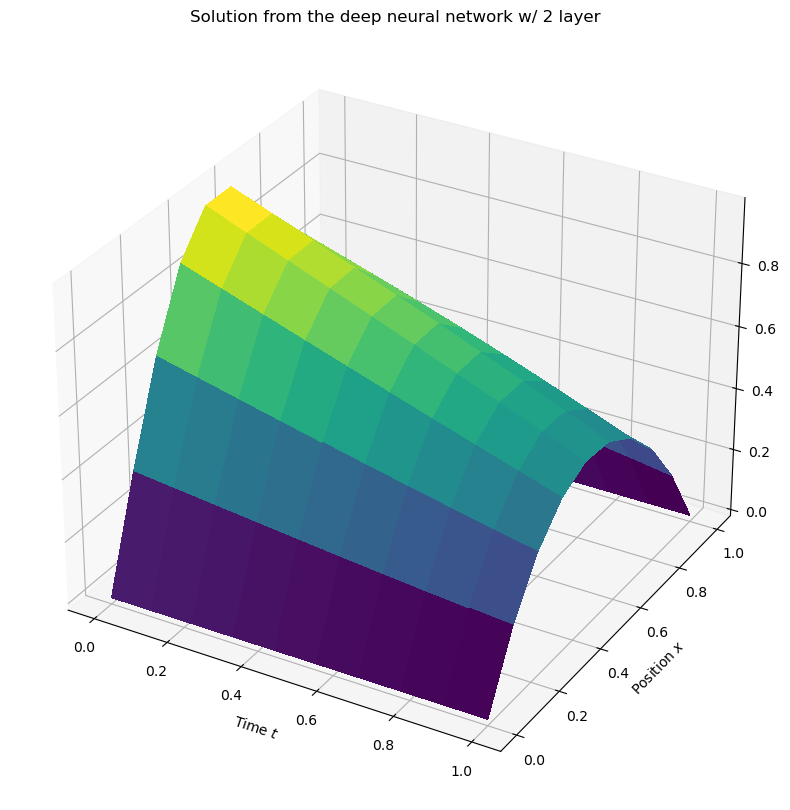

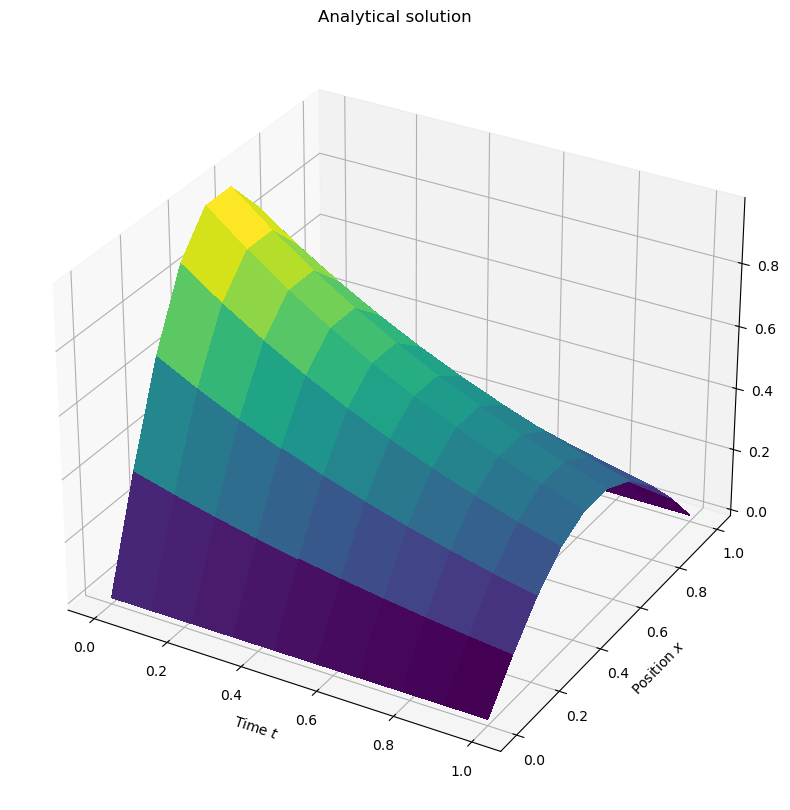

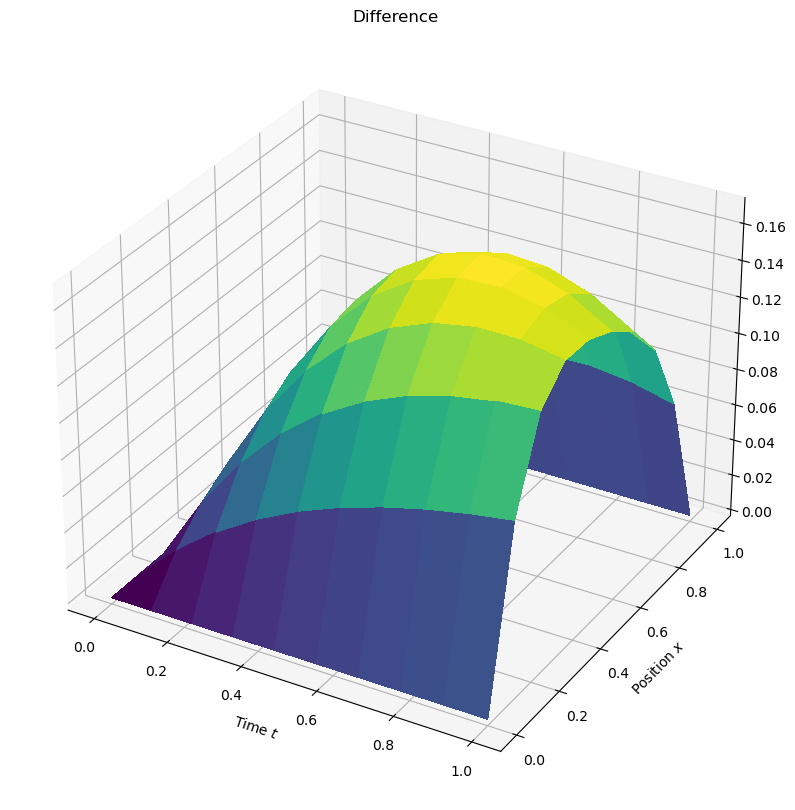

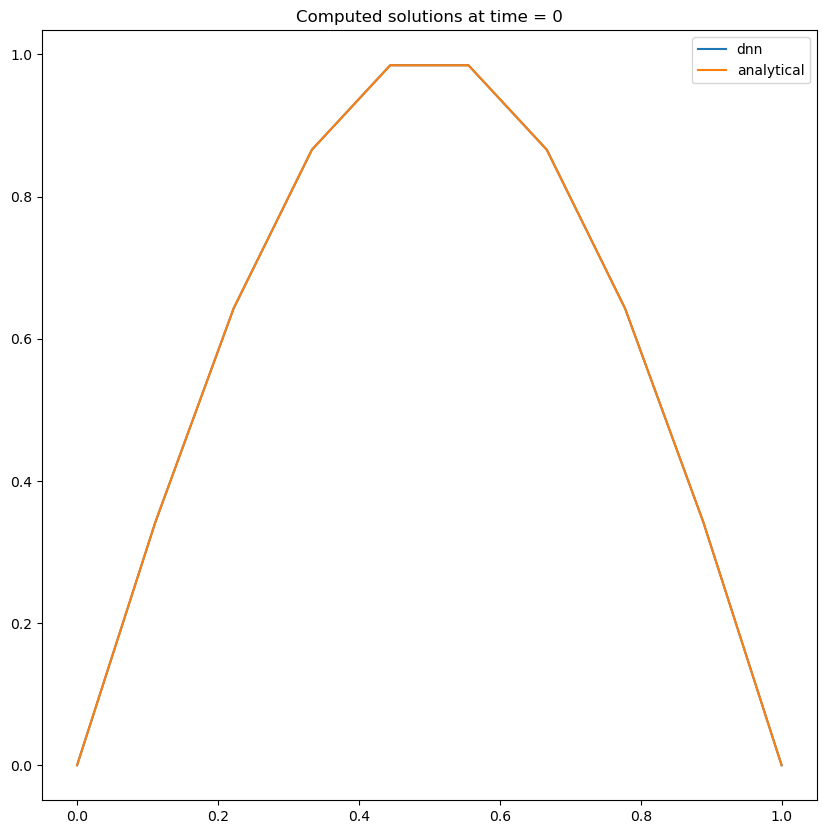

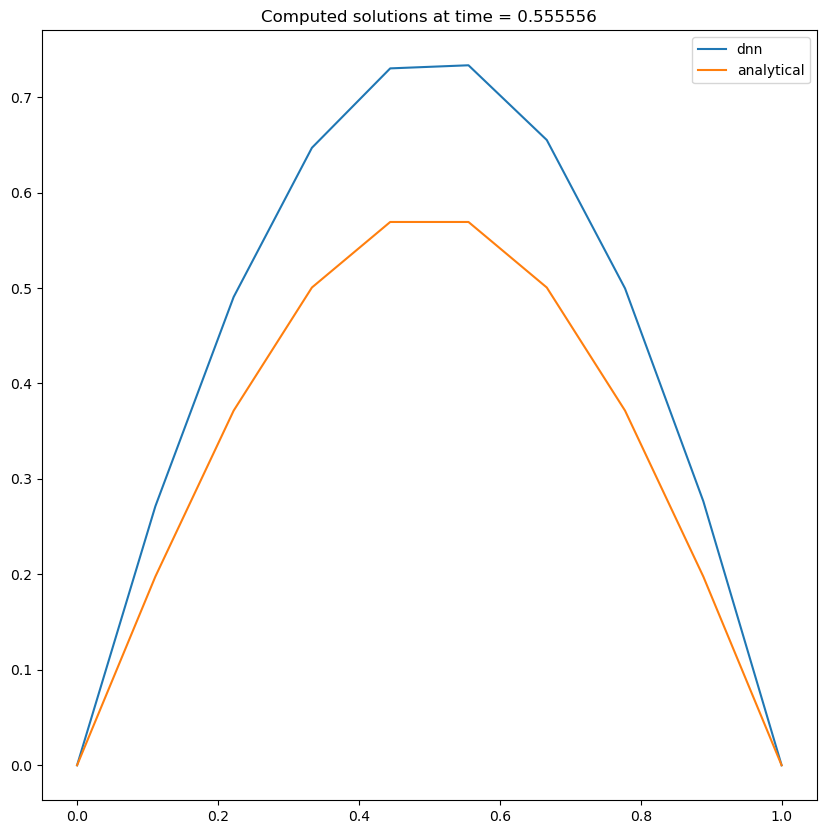

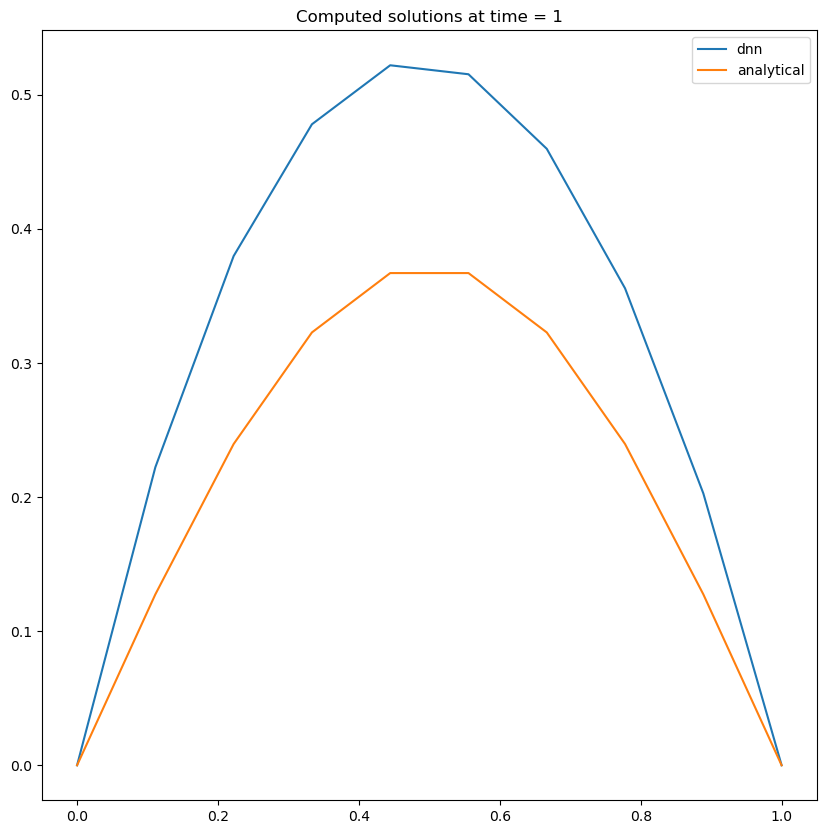

-----------    Lambda=  0.01    --------------
Initial cost:  0.30513059678351917
Final cost:  0.022601024245861353
Max absolute difference between the analytical solution and the network: 0.0451726


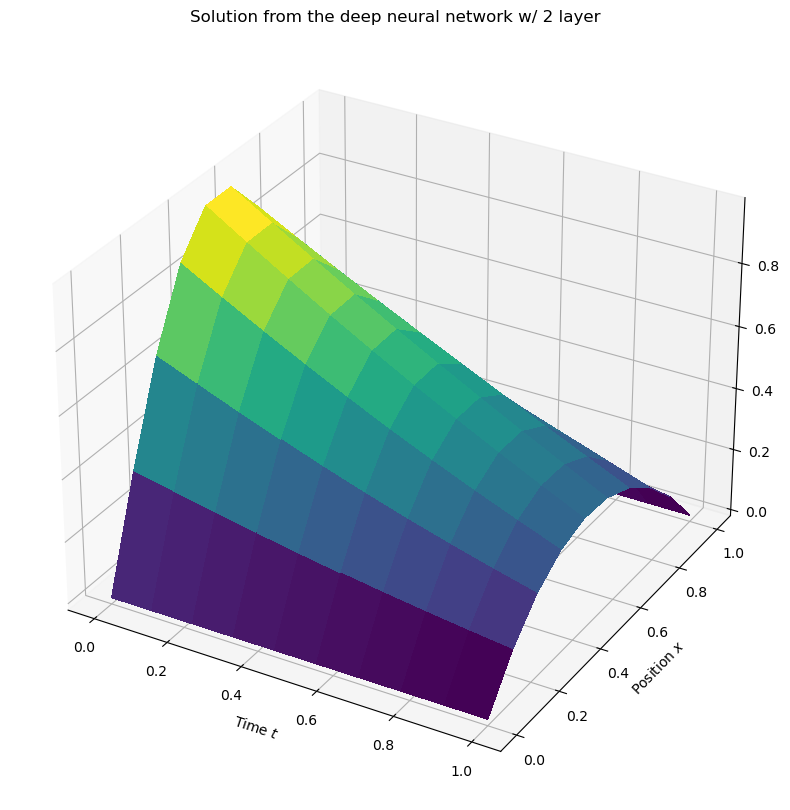

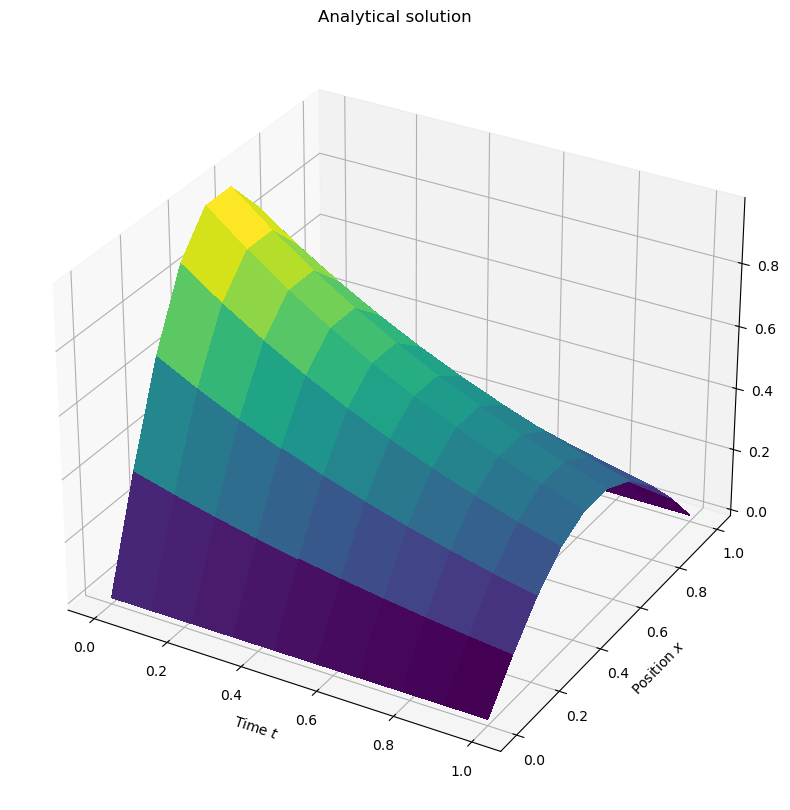

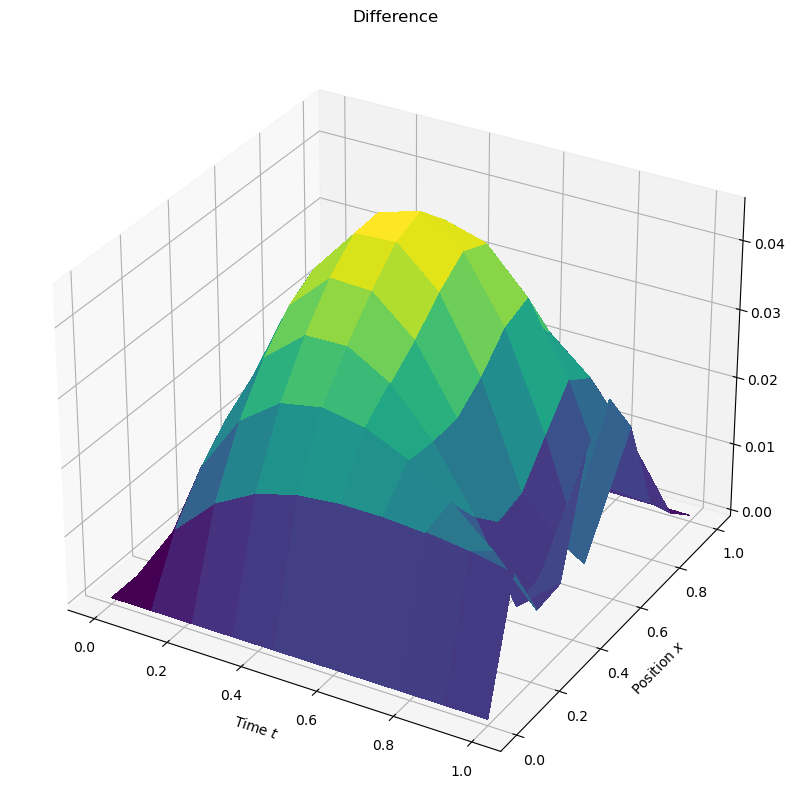

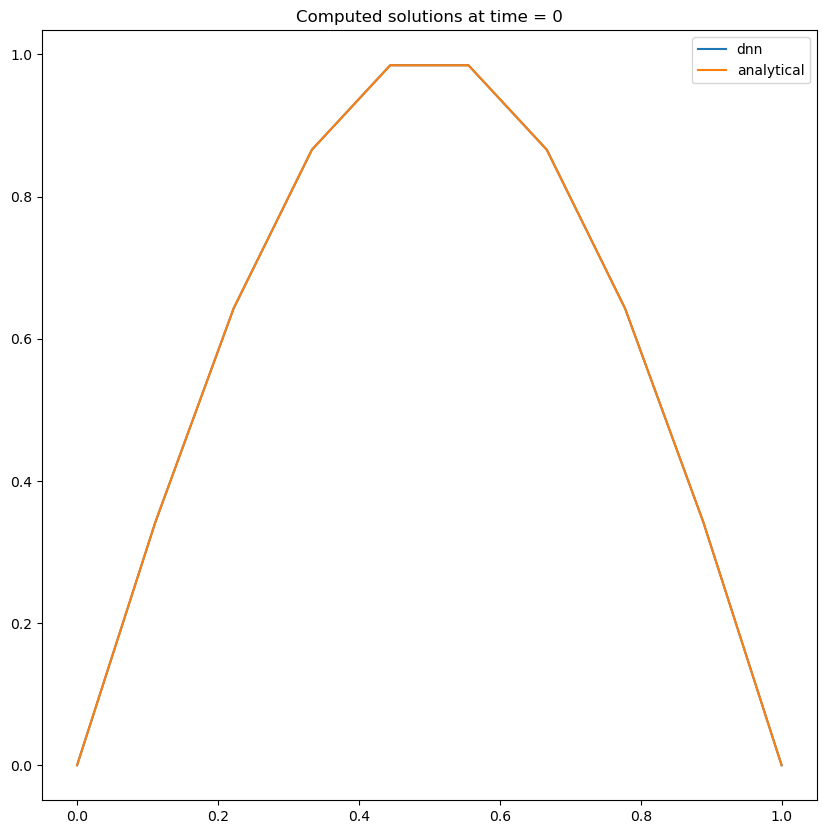

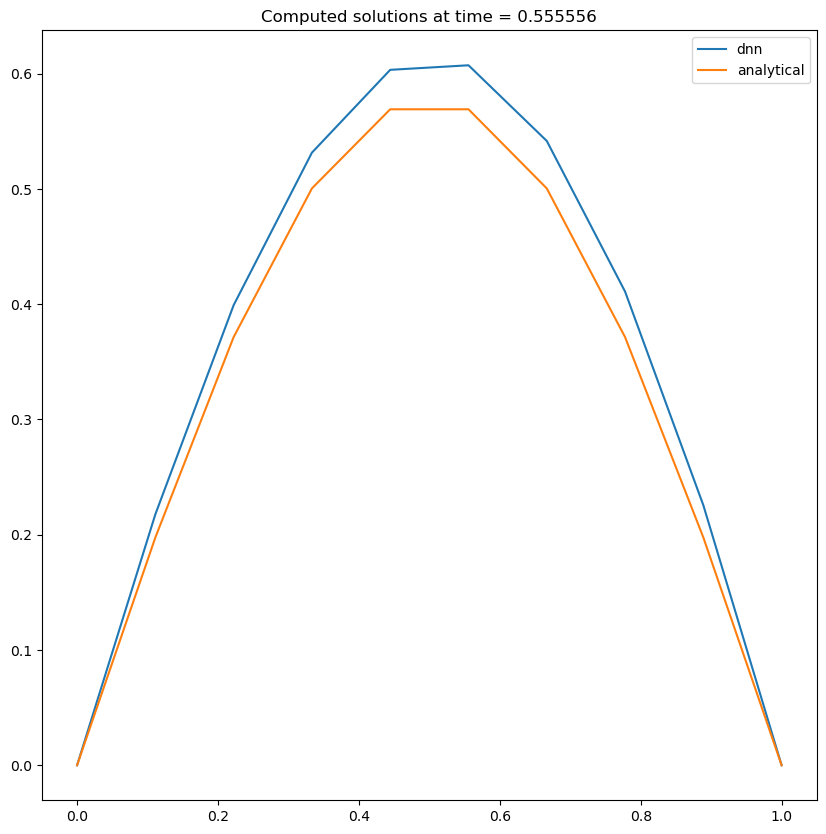

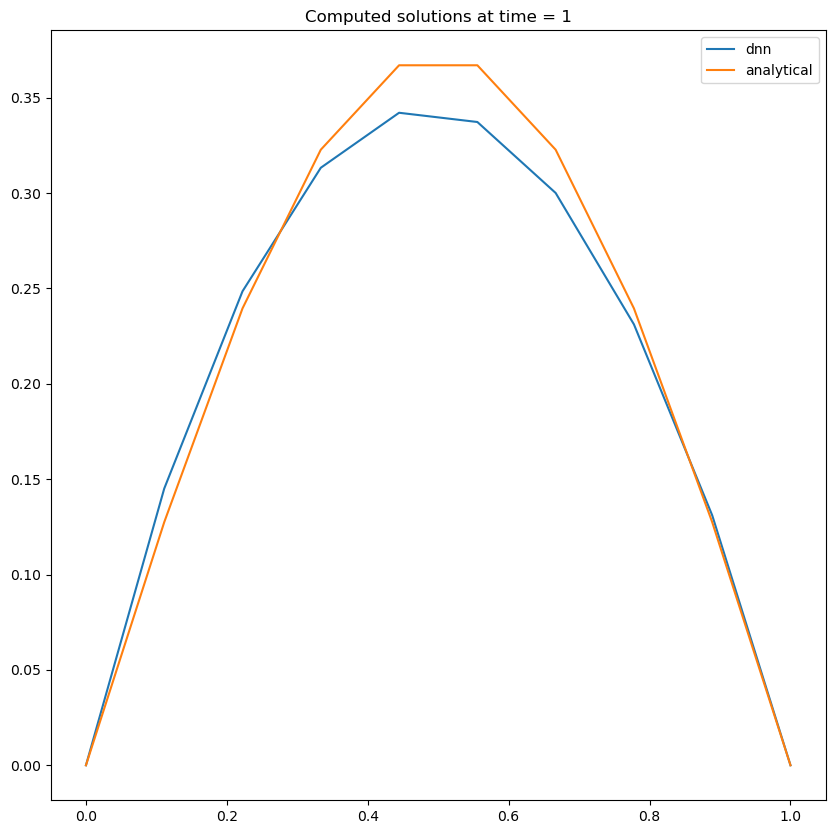

-----------    Lambda=  0.1    --------------
Initial cost:  0.30513059678351917
Final cost:  0.0027305116169765078
Max absolute difference between the analytical solution and the network: 0.0169678


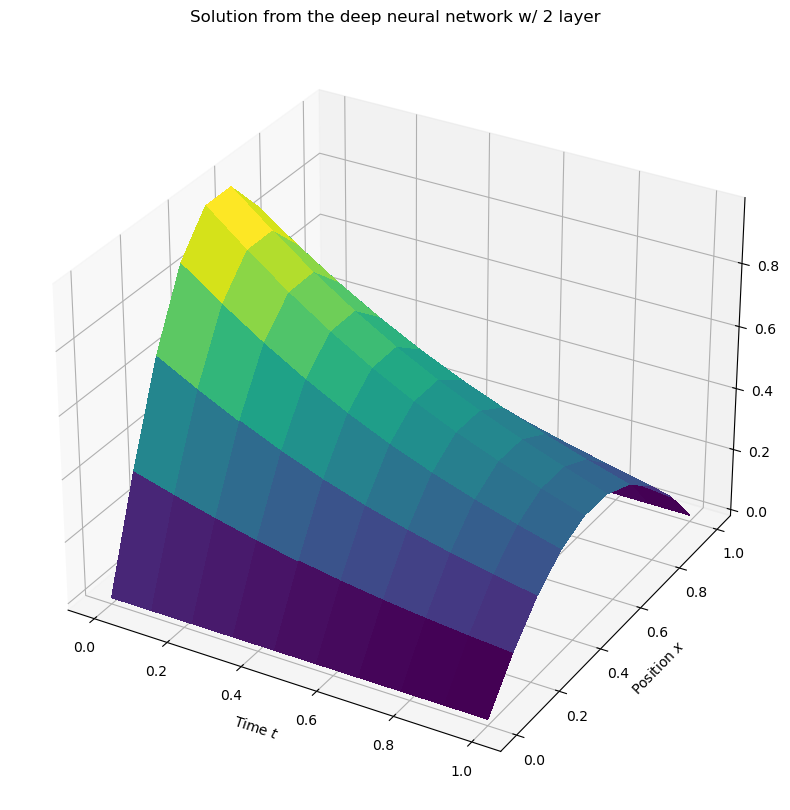

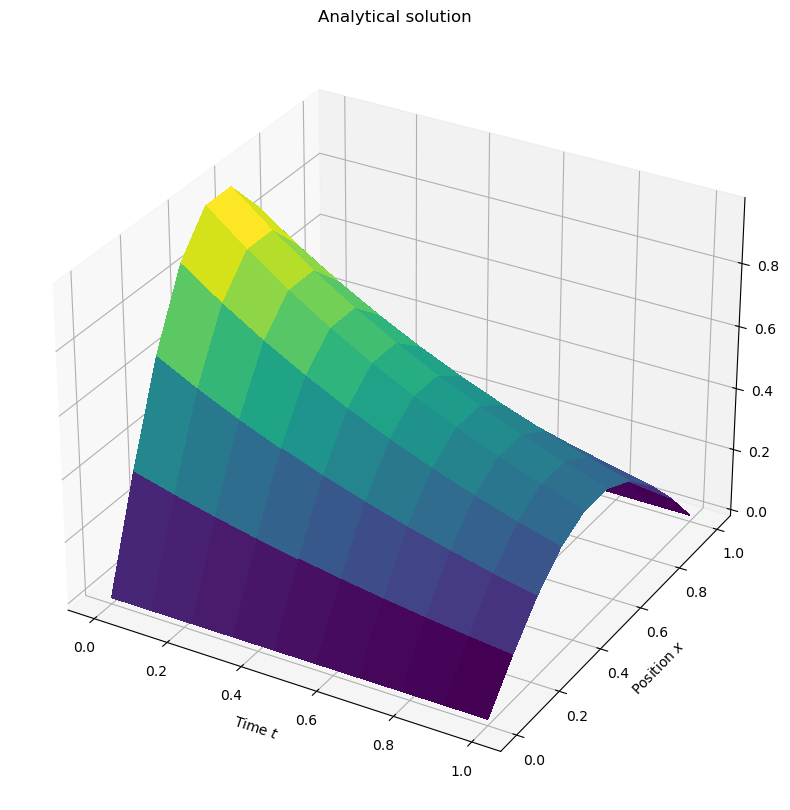

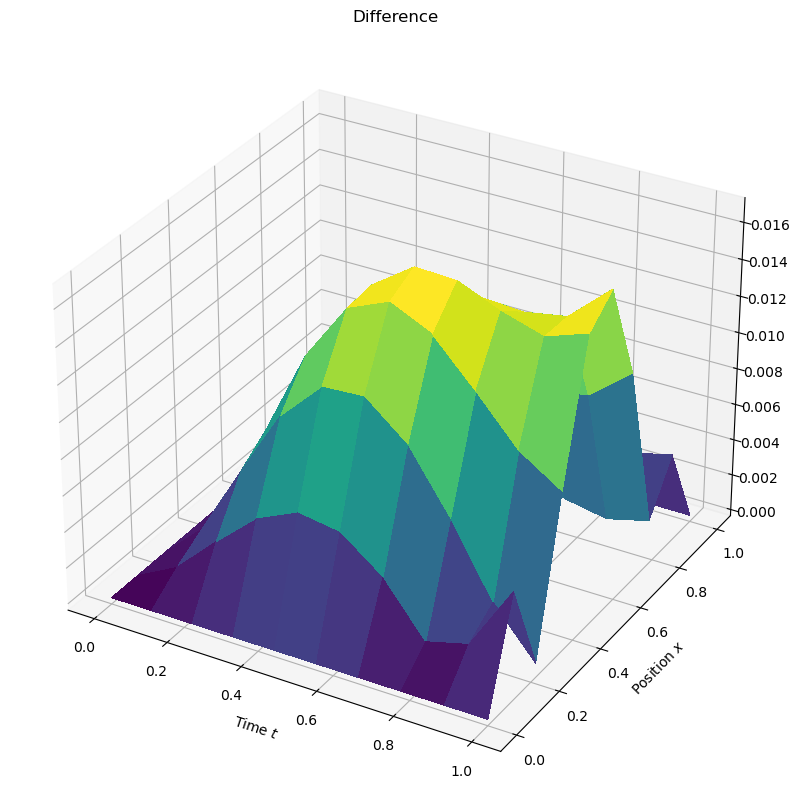

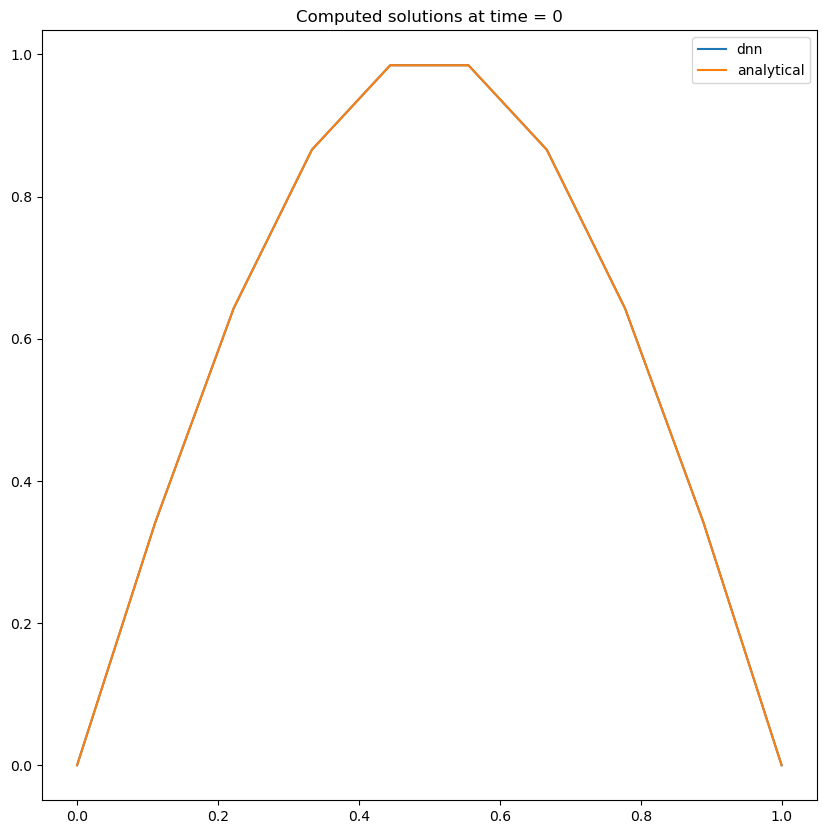

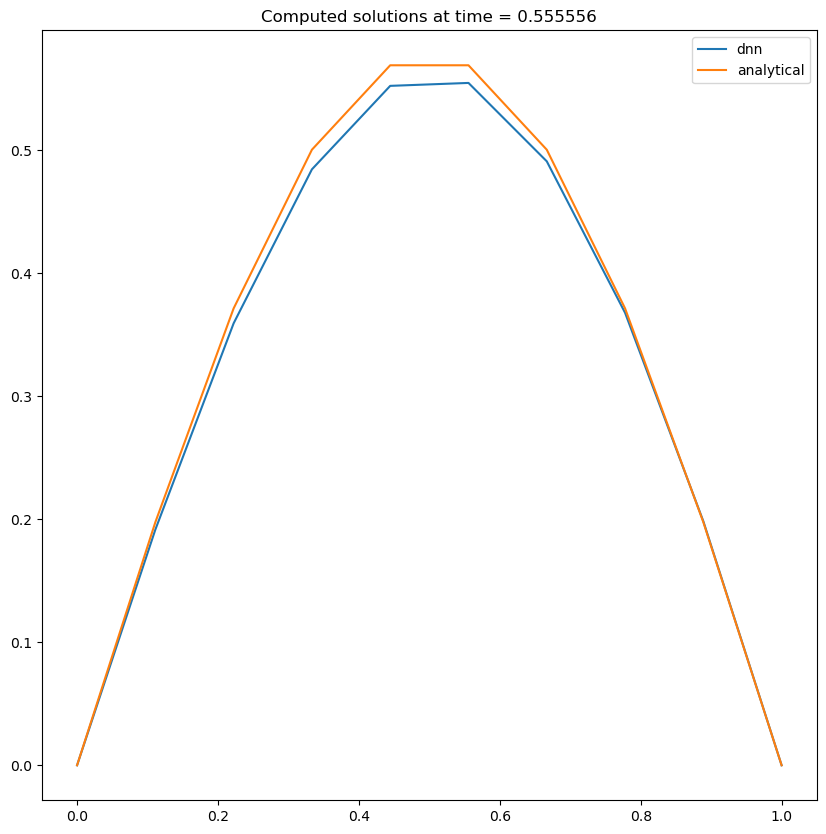

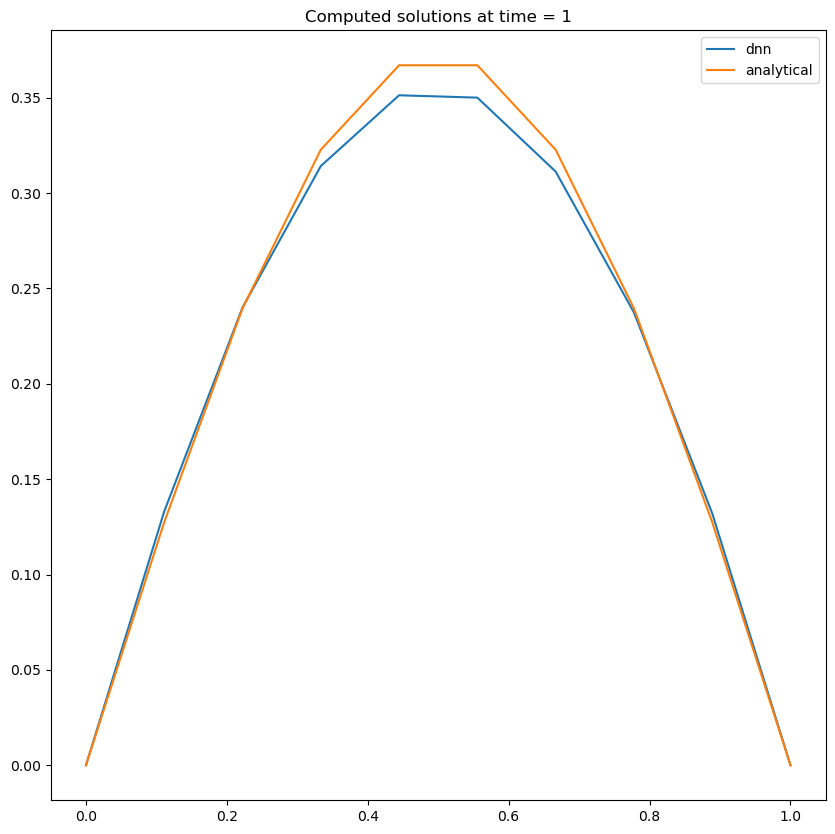

In [1]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os


def crear_carpeta(directorio, nombre_carpeta):
    """
    Crea una carpeta en el directorio especificado.

    Args:
    - directorio (str): El directorio donde se creará la carpeta.
    - nombre_carpeta (str): El nombre de la carpeta a crear.

    Returns:
    - str: Un mensaje indicando si la carpeta fue creada o si ya existía.
    """
    # Unir el directorio y el nombre de la carpeta
    ruta_carpeta = os.path.join(directorio, nombre_carpeta)

    # Verificar si la carpeta no existe
    if not os.path.exists(ruta_carpeta):
        # Crear la carpeta si no existe
        os.makedirs(ruta_carpeta)
        return f"La carpeta '{nombre_carpeta}' ha sido creada en '{directorio}'."
    else:
        return f"La carpeta '{nombre_carpeta}' ya existe en '{directorio}'."


## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))
    #return np.max(0,z)

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0
    k=0.1

    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - k*g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum /( np.size(x)*np.size(t) )

## For comparison, define the analytical solution
def g_analytic(point):
    x,t = point
    k=0.1
    return np.exp(-np.pi**2*t*k)*np.sin(np.pi*x)

## Set up a function for training the network to solve for the equation
def solve_pde_deep_neural_network(x,t, num_neurons, num_iter, lmb):
    ## Set up initial weigths and biases
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: ',cost_function(P, x, t))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        
        cost_grad =  cost_function_grad(P, x , t)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_grad[l]

    print('Final cost: ',cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    lmb_vals = np.logspace(-3, -1, 3)
    directorio = "./Imagenes/GD"
    datos_GD=[]
    for i in lmb_vals:
        nameFolder='lambda_'+"{:.2e}".format(i)
        crear_carpeta(directorio,nameFolder)

        print('-----------    Lambda= ', i ,'   --------------')
        npr.seed(15)

        ## Decide the vales of arguments to the function to solve
        Nx = 10; Nt = 10
        x = np.linspace(0, 1, Nx)
        t = np.linspace(0,1,Nt)

        ## Set up the parameters for the network
        num_hidden_neurons = [100, 25]
        num_iter = 250
        lmb = i

        P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)


            ## Store the results
        g_dnn_ag = np.zeros((Nx, Nt))
        G_analytical = np.zeros((Nx, Nt))
        for i,x_ in enumerate(x):
            for j, t_ in enumerate(t):
                point = np.array([x_, t_])
                g_dnn_ag[i,j] = g_trial(point,P)

                G_analytical[i,j] = g_analytic(point)
        datos_GD.append(g_dnn_ag)
        # Find the map difference between the analytical and the computed solution
        diff_ag = np.abs(g_dnn_ag - G_analytical)
        print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

        ## Plot the solutions in two dimensions, that being in position and time

        directory_figure= os.path.join(directorio,nameFolder)

        T,X = np.meshgrid(t,x)

        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
        s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        
        name_figure=os.path.join(directory_figure,'NN_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Analytical solution')
        s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Analytical_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Difference')
        s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Difference')
        plt.savefig(name_figure)

        ## Take some slices of the 3D plots just to see the solutions at particular times
        indx1 = 0
        indx2 = int(Nt/2)
        indx3 = Nt-1

        t1 = t[indx1]
        t2 = t[indx2]
        t3 = t[indx3]

        # Slice the results from the DNN
        res1 = g_dnn_ag[:,indx1]
        res2 = g_dnn_ag[:,indx2]
        res3 = g_dnn_ag[:,indx3]

        # Slice the analytical results
        res_analytical1 = G_analytical[:,indx1]
        res_analytical2 = G_analytical[:,indx2]
        res_analytical3 = G_analytical[:,indx3]

        # Plot the slices
        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t1)
        plt.plot(x, res1)
        plt.plot(x,res_analytical1)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t1")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t2)
        plt.plot(x, res2)
        plt.plot(x,res_analytical2)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t2")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t3)
        plt.plot(x, res3)
        plt.plot(x,res_analytical3)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t3")
        plt.savefig(name_figure)

        plt.show()


        

        

### GRADIENT DESCENT WITH MOMENTUM 

-----------    Lambda=  0.001    --------------


/Users/gastoncisterna/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Initial cost:  0.30513059678351917
Final cost:  0.0867282263582613
Max absolute difference between the analytical solution and the network: 0.170769


/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_3692/3952078841.py:180: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_3692/3952078841.py:191: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projectio

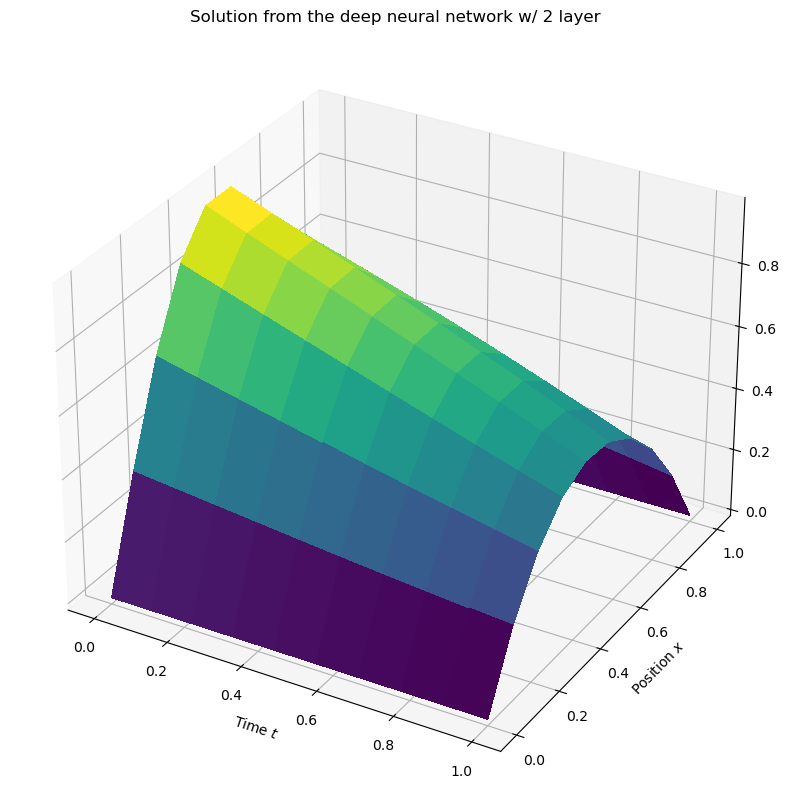

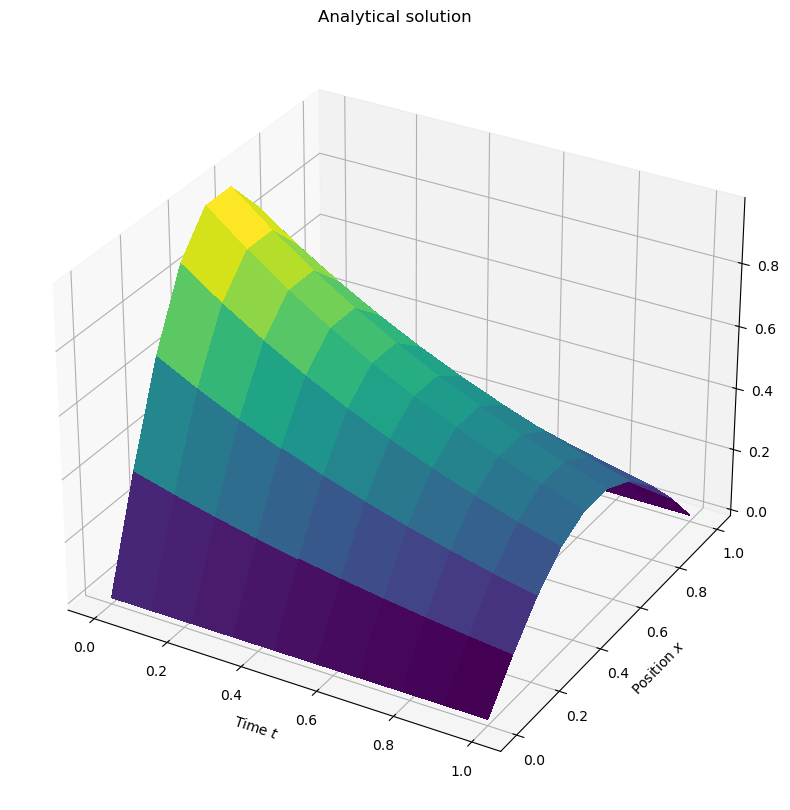

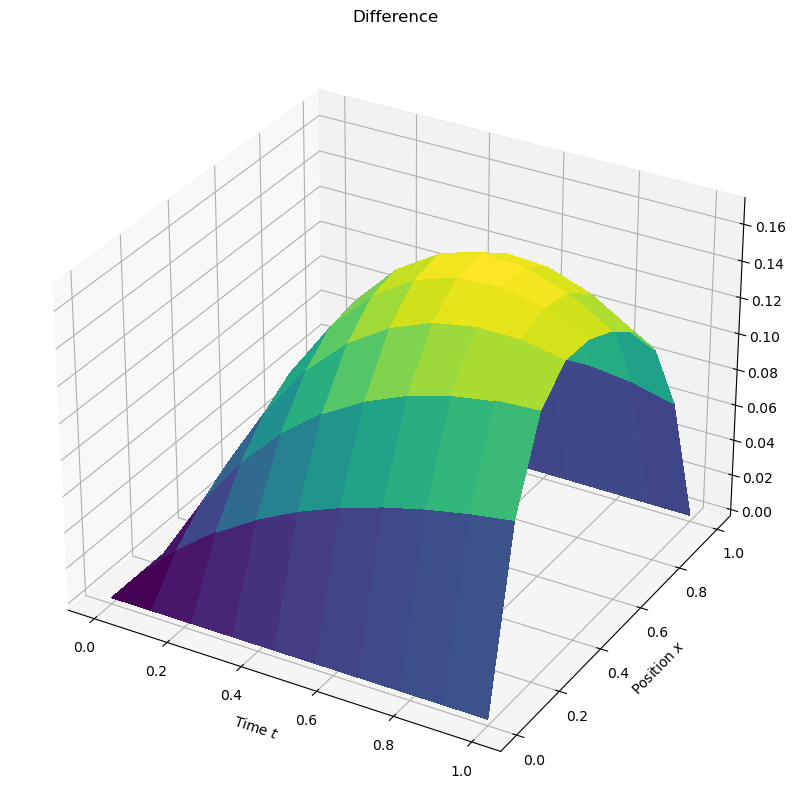

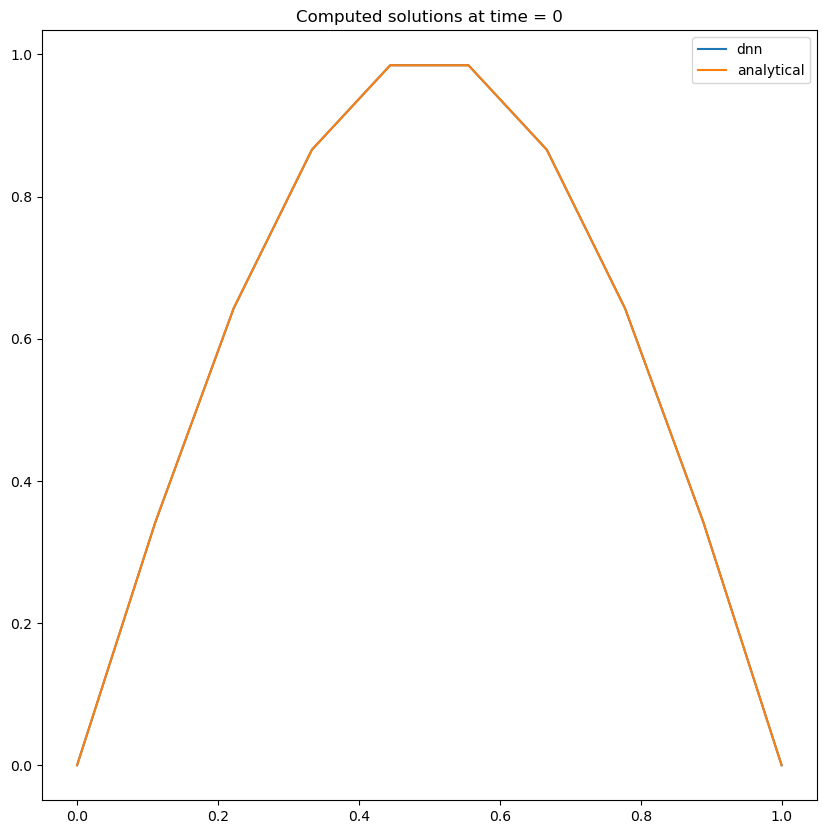

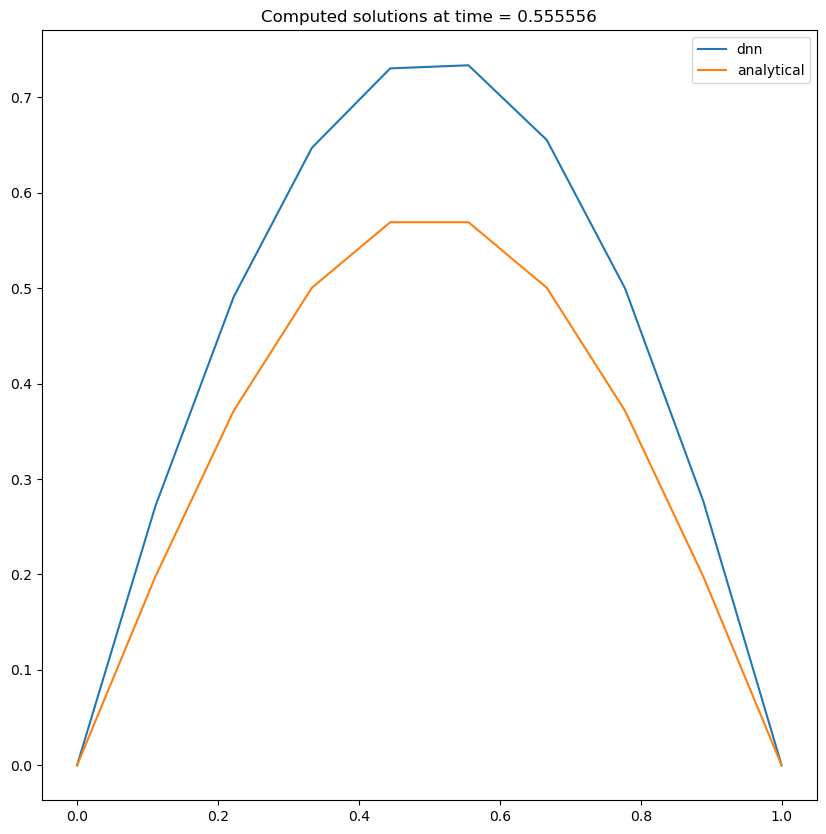

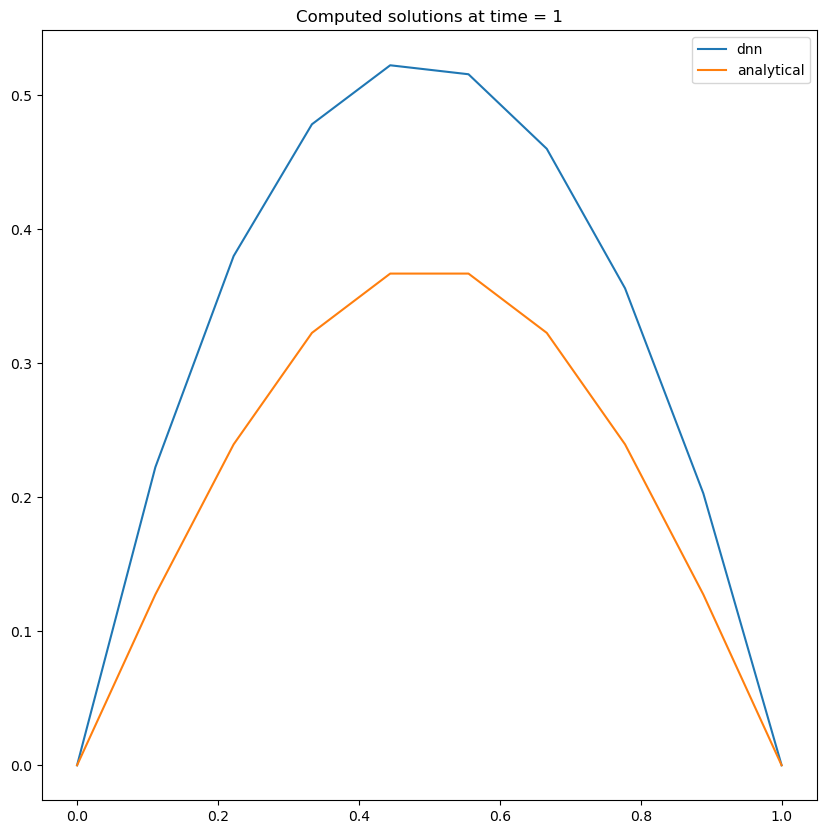

-----------    Lambda=  0.01    --------------
Initial cost:  0.30513059678351917
Final cost:  0.022694651301590492
Max absolute difference between the analytical solution and the network: 0.045312


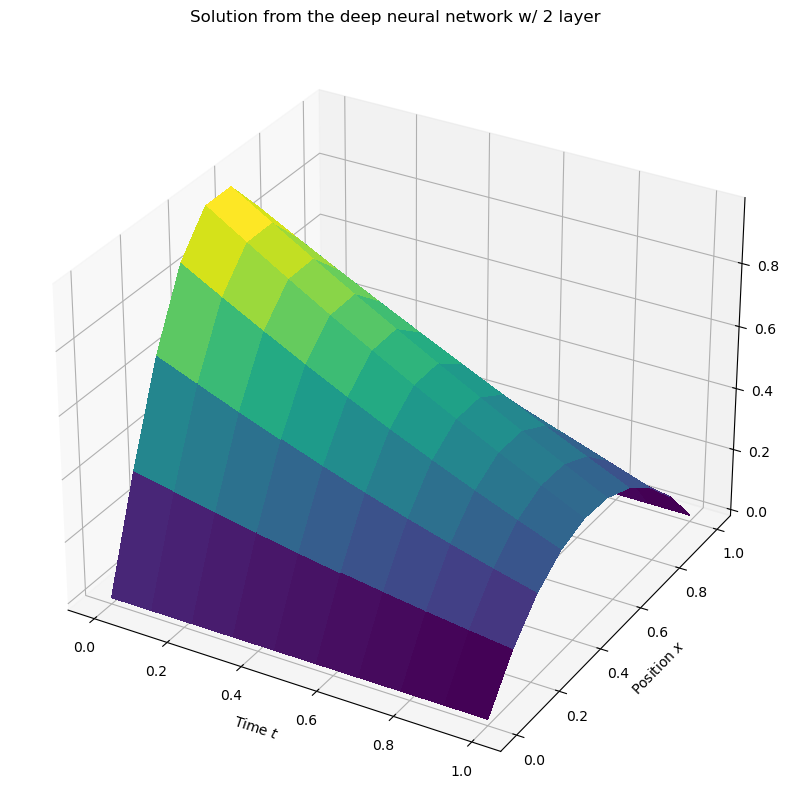

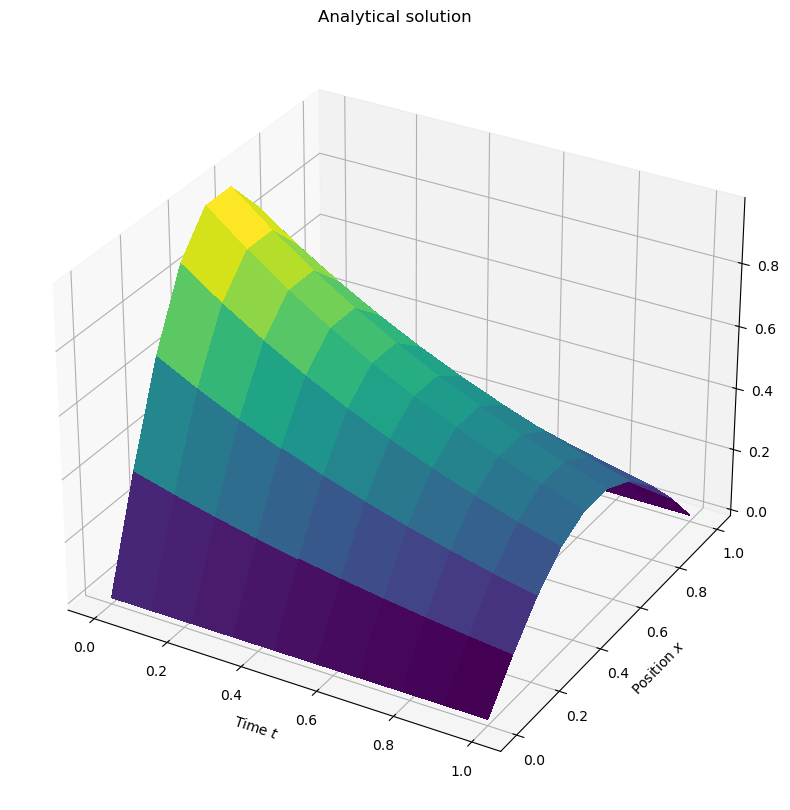

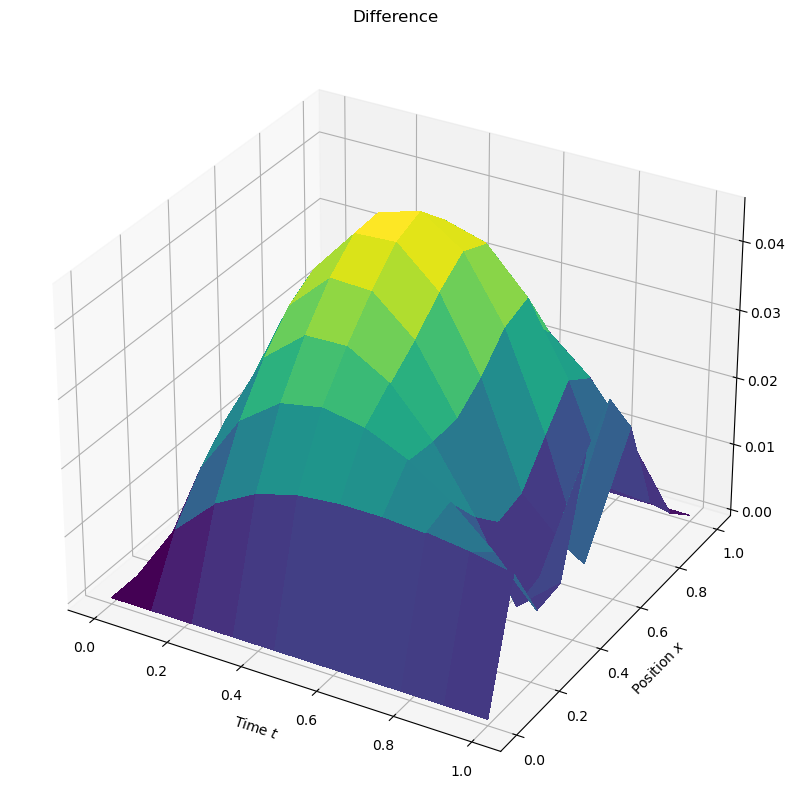

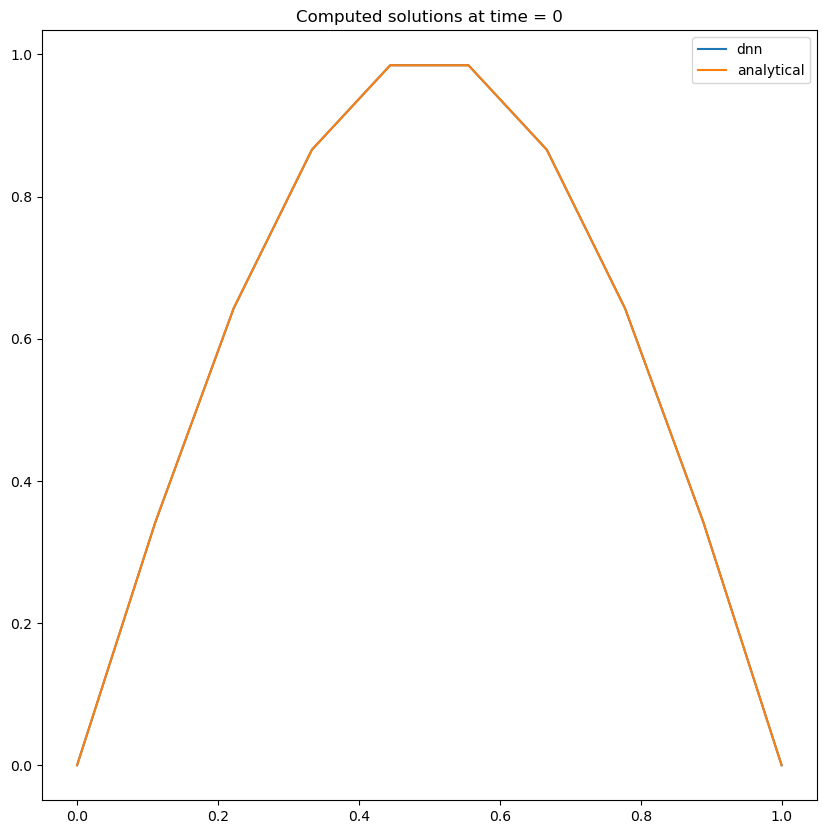

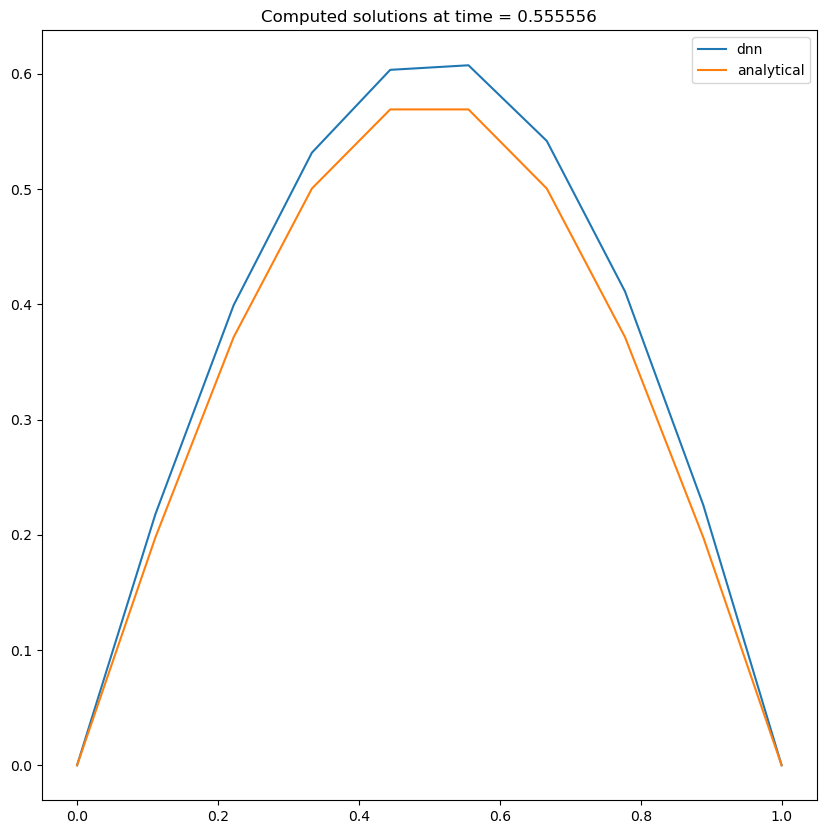

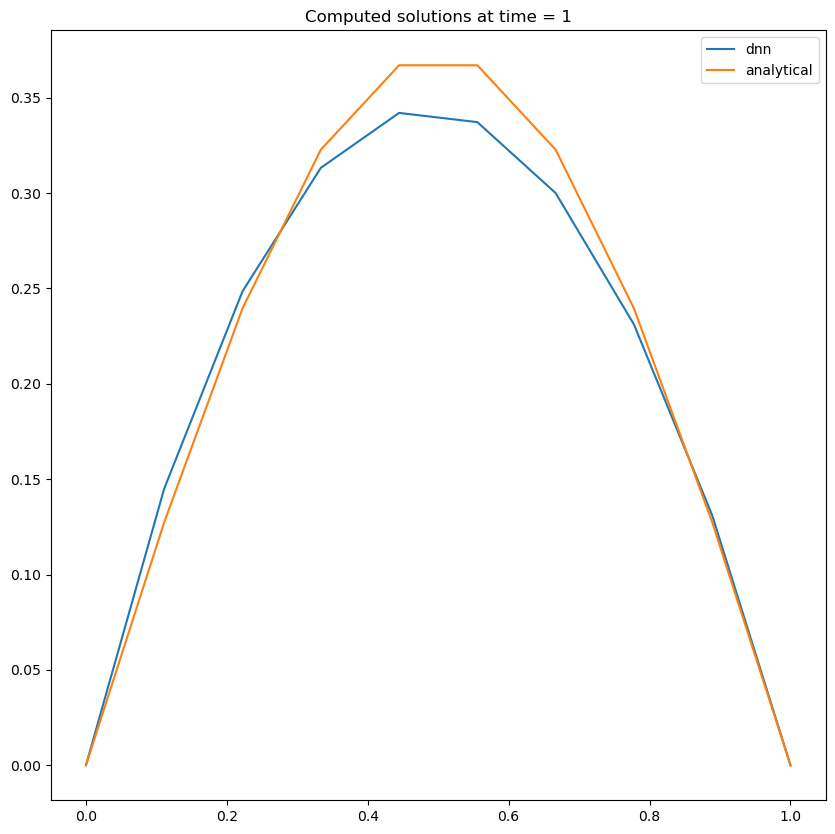

-----------    Lambda=  0.1    --------------
Initial cost:  0.30513059678351917
Final cost:  0.0027822397427870087
Max absolute difference between the analytical solution and the network: 0.0171572


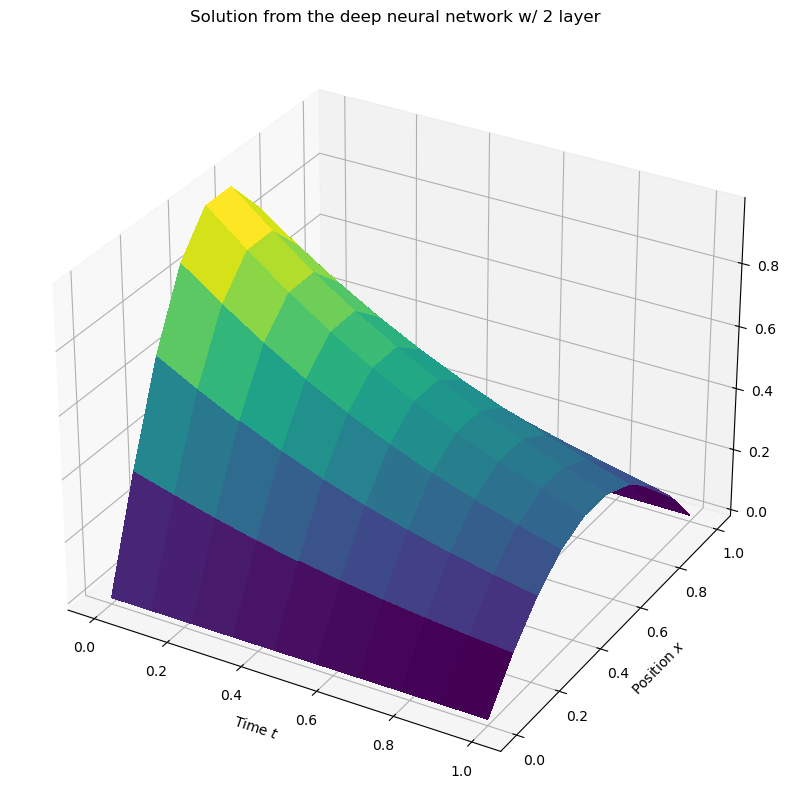

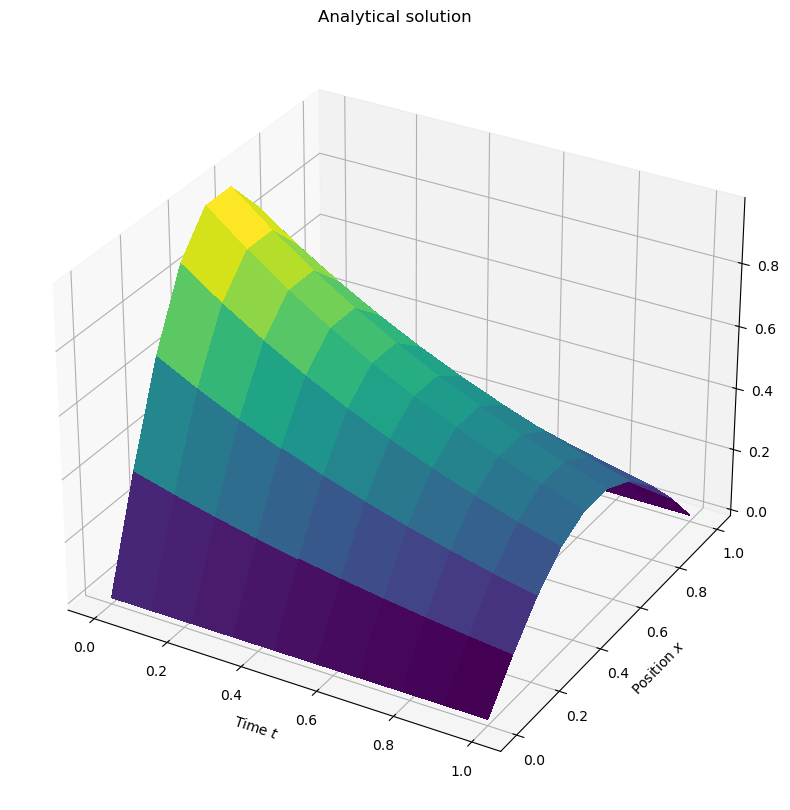

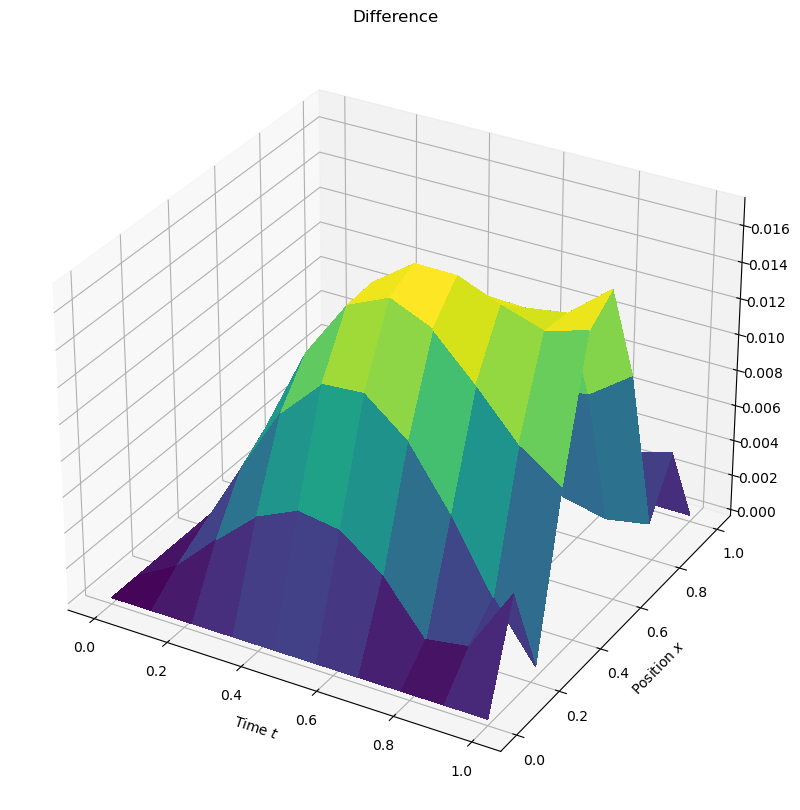

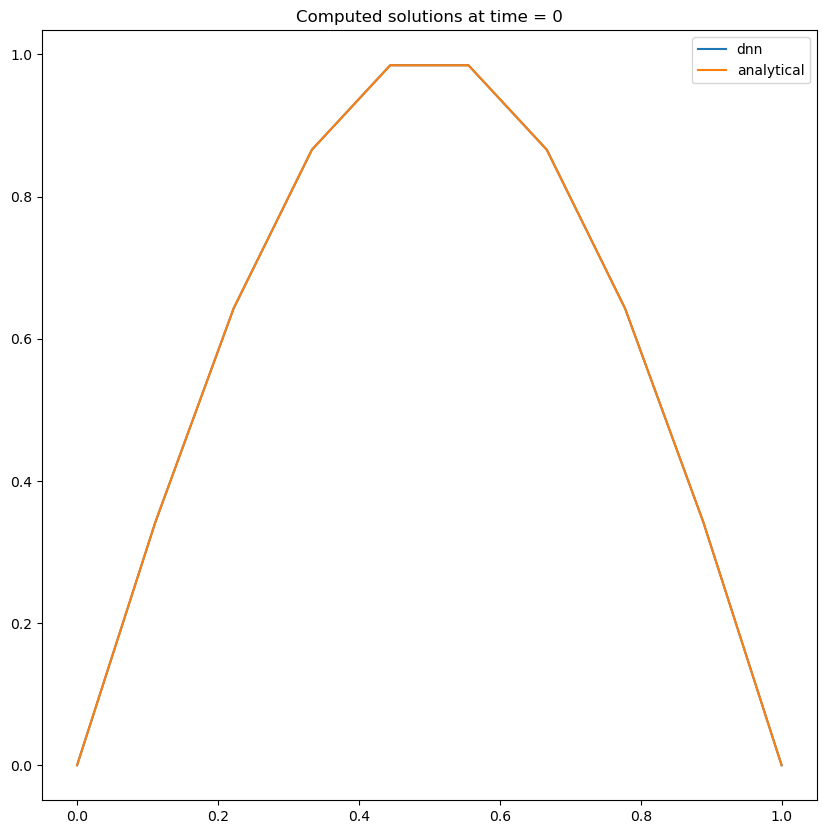

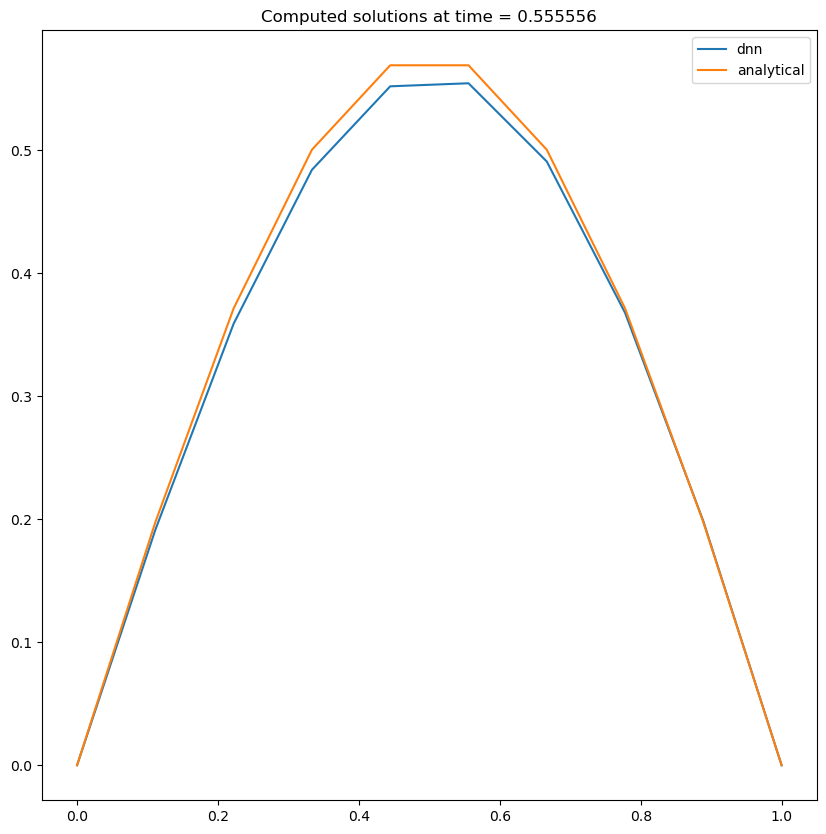

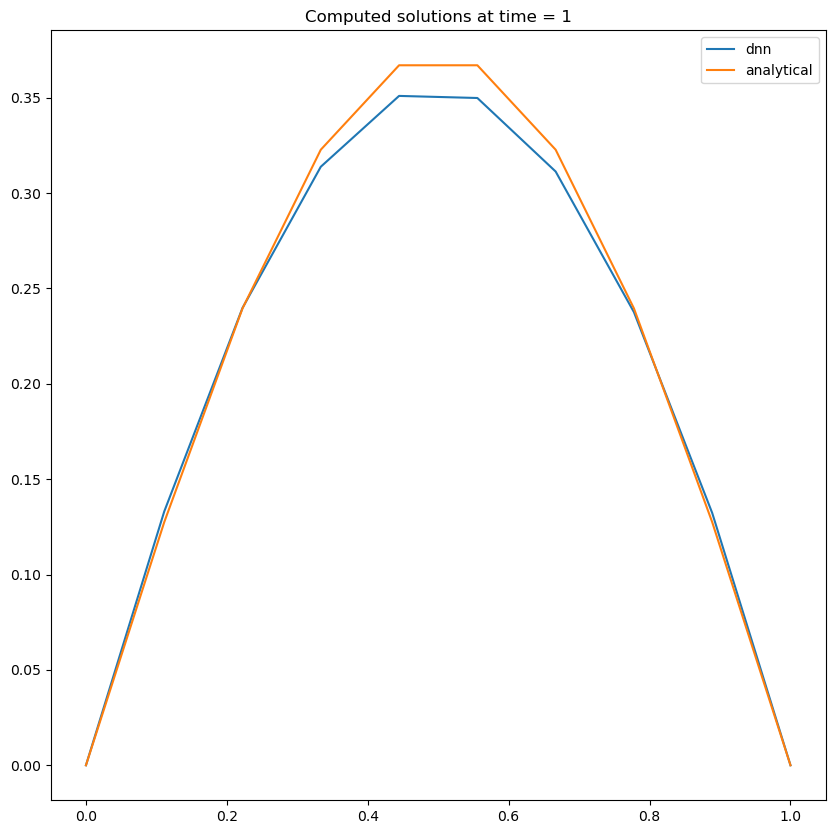

In [4]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0
    k=0.1
    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - k*g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum /( np.size(x)*np.size(t) )

## For comparison, define the analytical solution
def g_analytic(point):
    x,t = point
    k=0.1
    return np.exp(-np.pi**2*t*k)*np.sin(np.pi*x)

## Set up a function for training the network to solve for the equation
def solve_pde_deep_neural_network(x, t, num_neurons, num_iter, lmb, beta=0.85):
    N_hidden = np.size(num_neurons)

    # Initialize the list of parameters
    P = [None] * (N_hidden + 1)

    P[0] = npr.randn(num_neurons[0], 2 + 1)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)

    P[-1] = npr.randn(1, num_neurons[-1] + 1)

    print('Initial cost: ', cost_function(P, x, t))

    cost_function_grad = grad(cost_function, 0)

    # Initialize momentum terms for each parameter
    momentums = [np.zeros_like(param) for param in P]

    # Perform gradient descent with momentum
    for i in range(num_iter):
        cost_grad = cost_function_grad(P, x, t)

        for l in range(N_hidden + 1):
            momentums[l] = beta * momentums[l] + (1 - beta) * cost_grad[l]
            P[l] = P[l] - lmb * momentums[l]

    print('Final cost: ', cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    lmb_vals = np.logspace(-3, -1, 3)
    directorio = "./Imagenes/MGD"
    datos_MGD=[]
    for i in lmb_vals:
        nameFolder='lambda_'+"{:.2e}".format(i)
        crear_carpeta(directorio,nameFolder)

        print('-----------    Lambda= ', i ,'   --------------')
        npr.seed(15)

        ## Decide the vales of arguments to the function to solve
        Nx = 10; Nt = 10
        x = np.linspace(0, 1, Nx)
        t = np.linspace(0,1,Nt)

        ## Set up the parameters for the network
        num_hidden_neurons = [100, 25]
        num_iter = 250
        lmb = i

        P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

        

            ## Store the results
        g_dnn_ag = np.zeros((Nx, Nt))
        G_analytical = np.zeros((Nx, Nt))
        for i,x_ in enumerate(x):
            for j, t_ in enumerate(t):
                point = np.array([x_, t_])
                g_dnn_ag[i,j] = g_trial(point,P)

                G_analytical[i,j] = g_analytic(point)

        datos_MGD.append(g_dnn_ag)
        # Find the map difference between the analytical and the computed solution
        diff_ag = np.abs(g_dnn_ag - G_analytical)
        print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

        ## Plot the solutions in two dimensions, that being in position and time

        directory_figure= os.path.join(directorio,nameFolder)

        T,X = np.meshgrid(t,x)

        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
        s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        
        name_figure=os.path.join(directory_figure,'NN_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Analytical solution')
        s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Analytical_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Difference')
        s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Difference')
        plt.savefig(name_figure)

        ## Take some slices of the 3D plots just to see the solutions at particular times
        indx1 = 0
        indx2 = int(Nt/2)
        indx3 = Nt-1

        t1 = t[indx1]
        t2 = t[indx2]
        t3 = t[indx3]

        # Slice the results from the DNN
        res1 = g_dnn_ag[:,indx1]
        res2 = g_dnn_ag[:,indx2]
        res3 = g_dnn_ag[:,indx3]

        # Slice the analytical results
        res_analytical1 = G_analytical[:,indx1]
        res_analytical2 = G_analytical[:,indx2]
        res_analytical3 = G_analytical[:,indx3]

        # Plot the slices
        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t1)
        plt.plot(x, res1)
        plt.plot(x,res_analytical1)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t1")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t2)
        plt.plot(x, res2)
        plt.plot(x,res_analytical2)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t2")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t3)
        plt.plot(x, res3)
        plt.plot(x,res_analytical3)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t3")
        plt.savefig(name_figure)

        plt.show()

## ADAM METHOD

-----------    Lambda=  0.001    --------------
Initial cost:  0.30513059678351917
Final cost:  0.00048169764379748625
Max absolute difference between the analytical solution and the network: 0.00688913


/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_3692/2125007939.py:193: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_3692/2125007939.py:204: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projectio

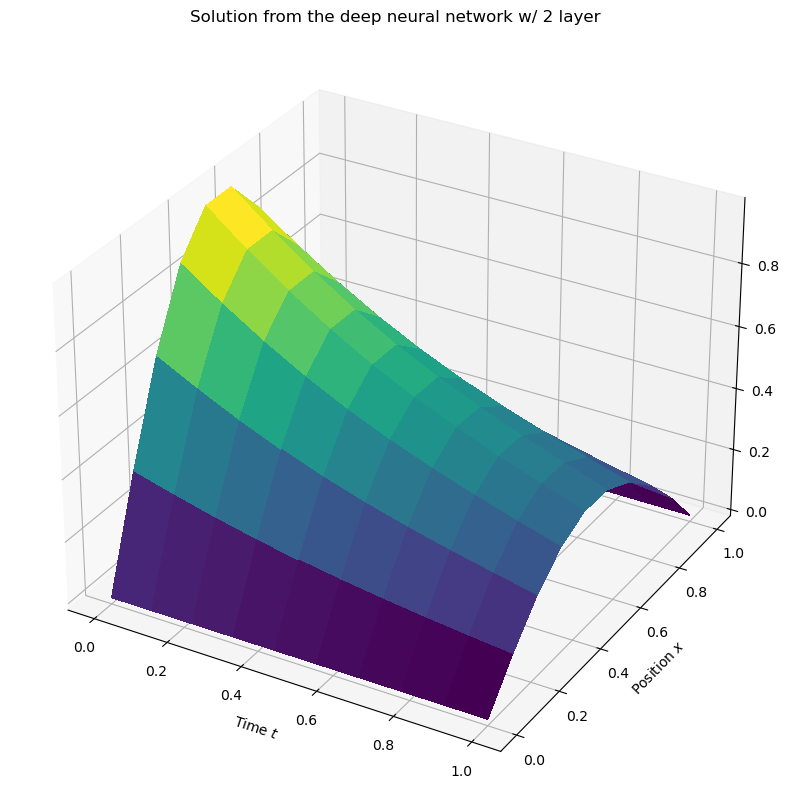

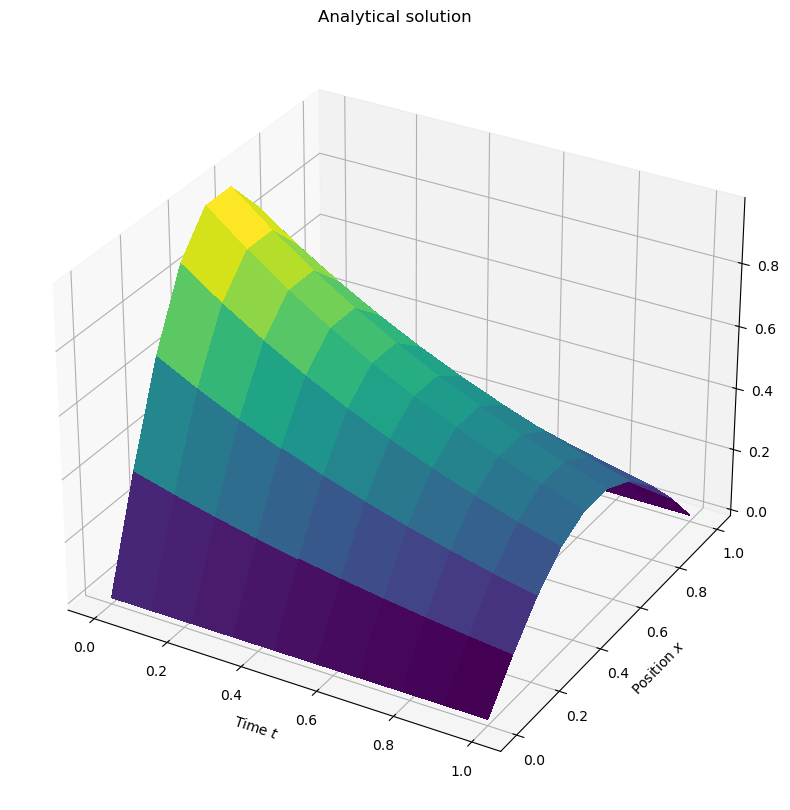

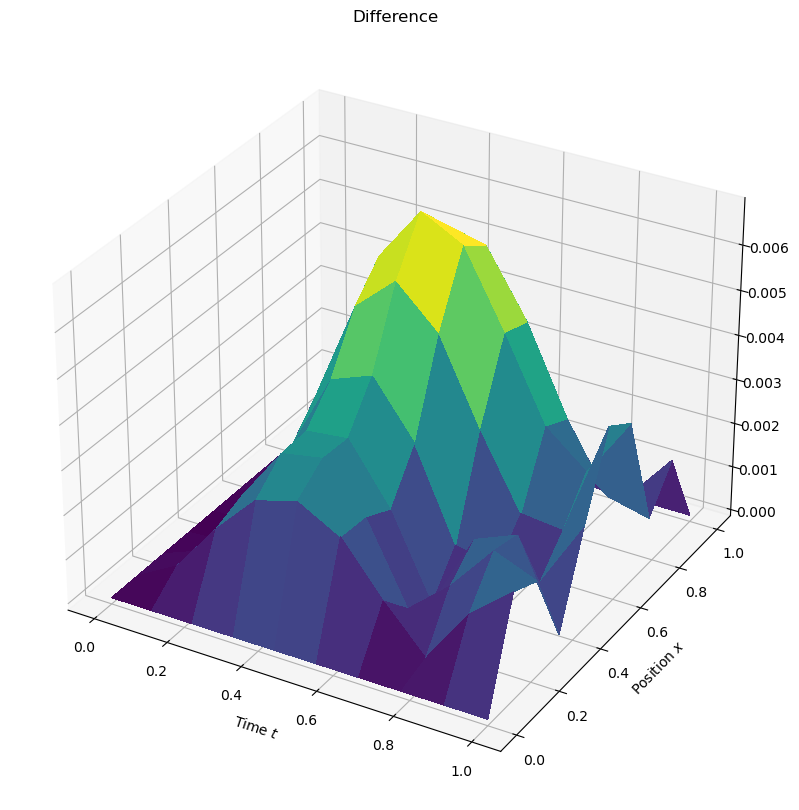

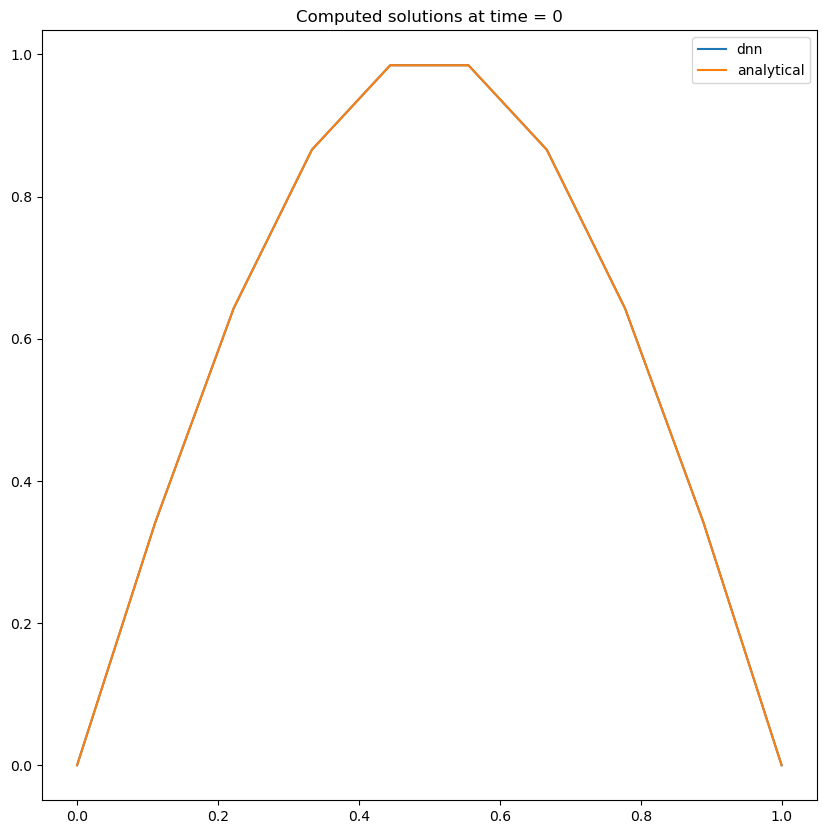

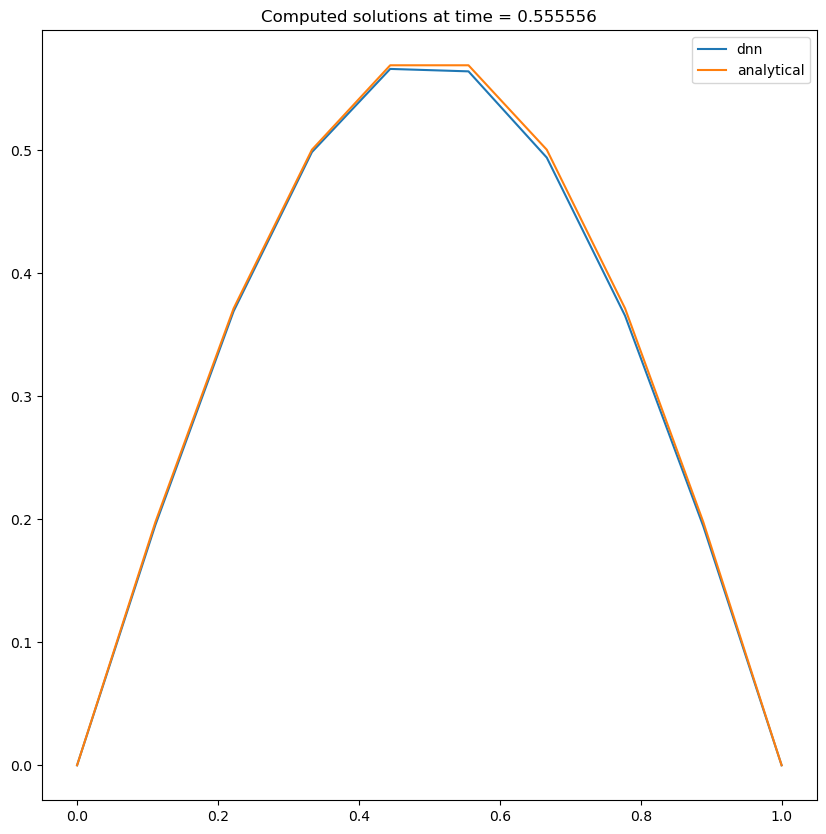

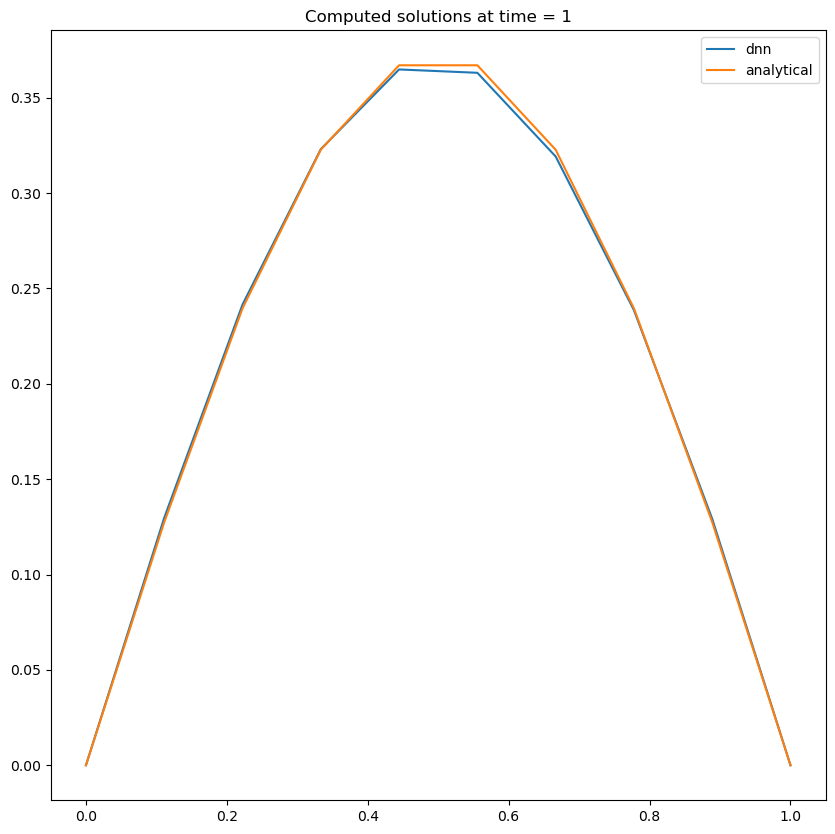

-----------    Lambda=  0.01    --------------
Initial cost:  0.30513059678351917
Final cost:  0.000129367624937698
Max absolute difference between the analytical solution and the network: 0.00341789


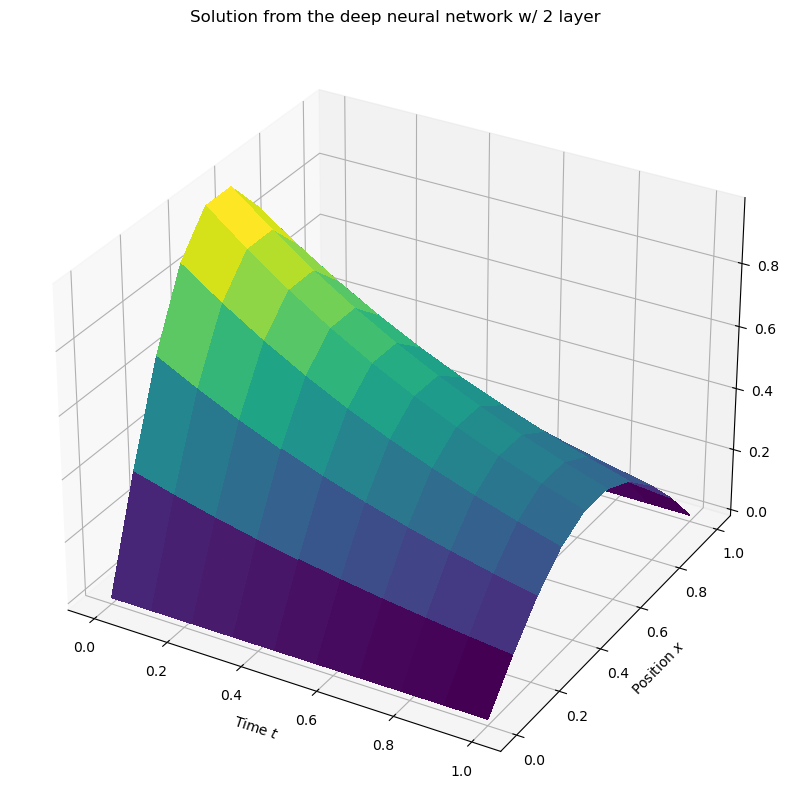

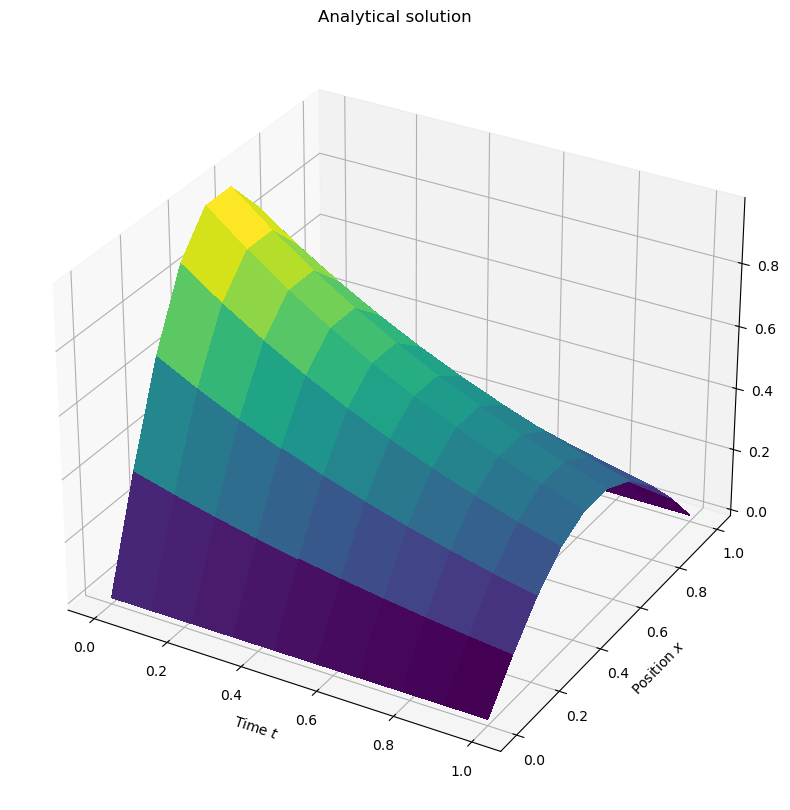

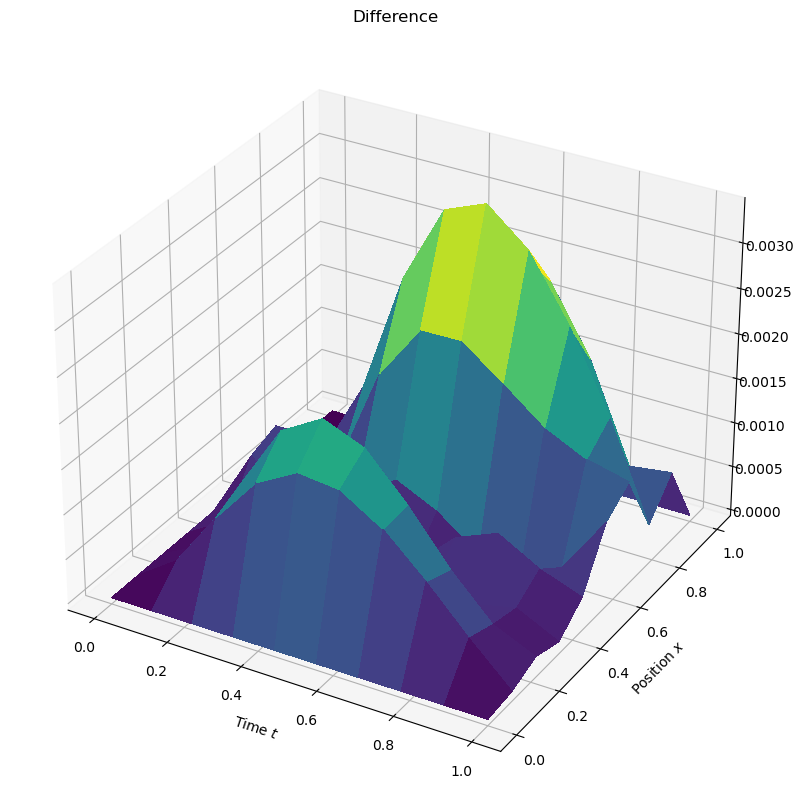

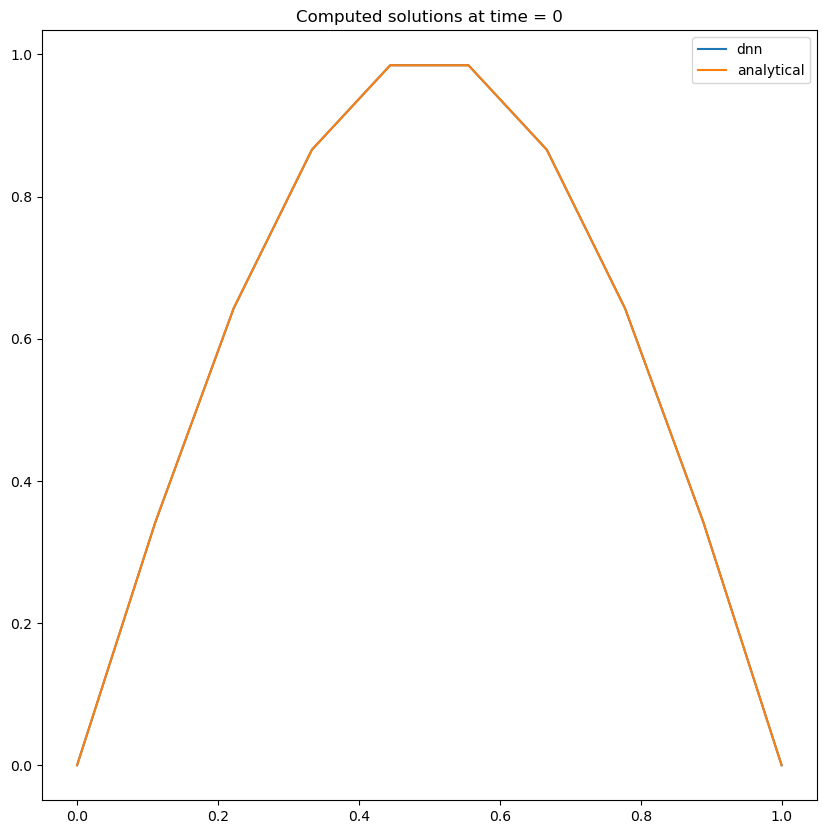

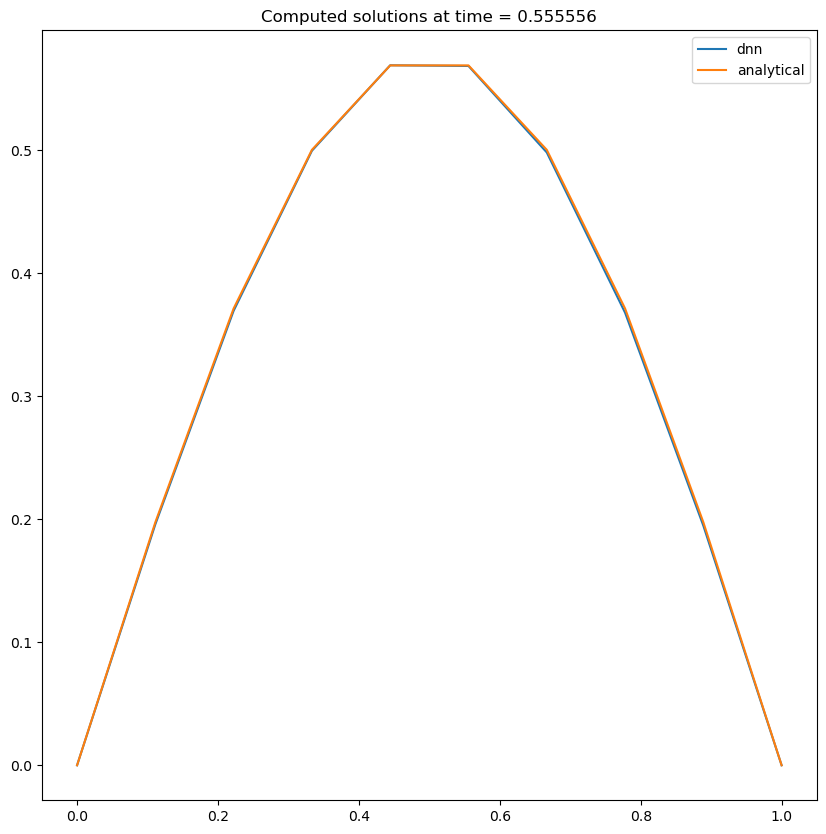

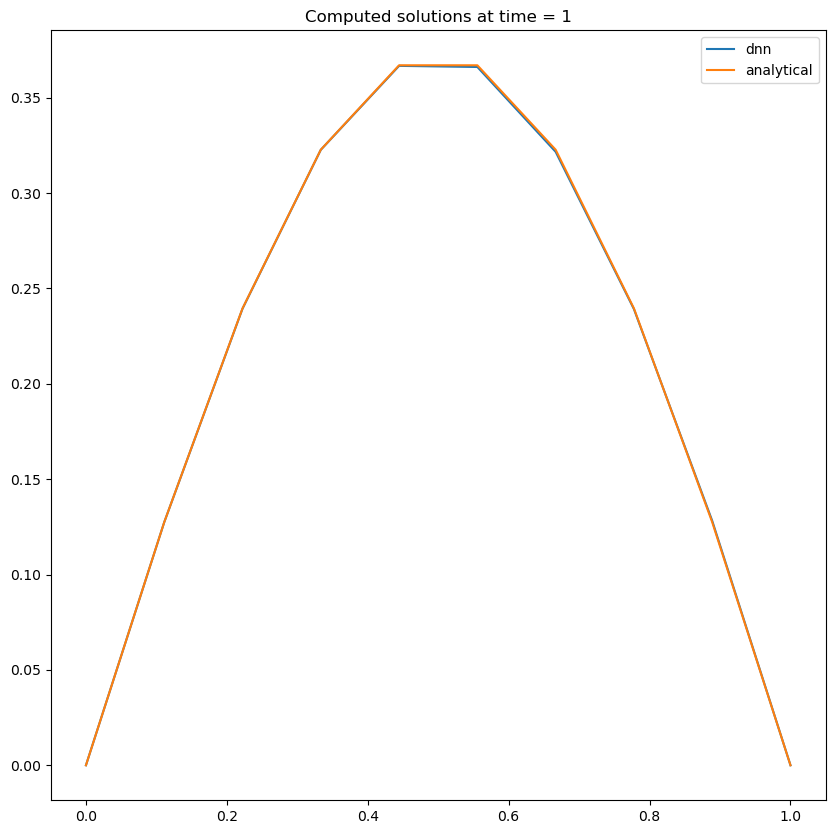

-----------    Lambda=  0.1    --------------
Initial cost:  0.30513059678351917
Final cost:  0.02728892561376387
Max absolute difference between the analytical solution and the network: 0.059321


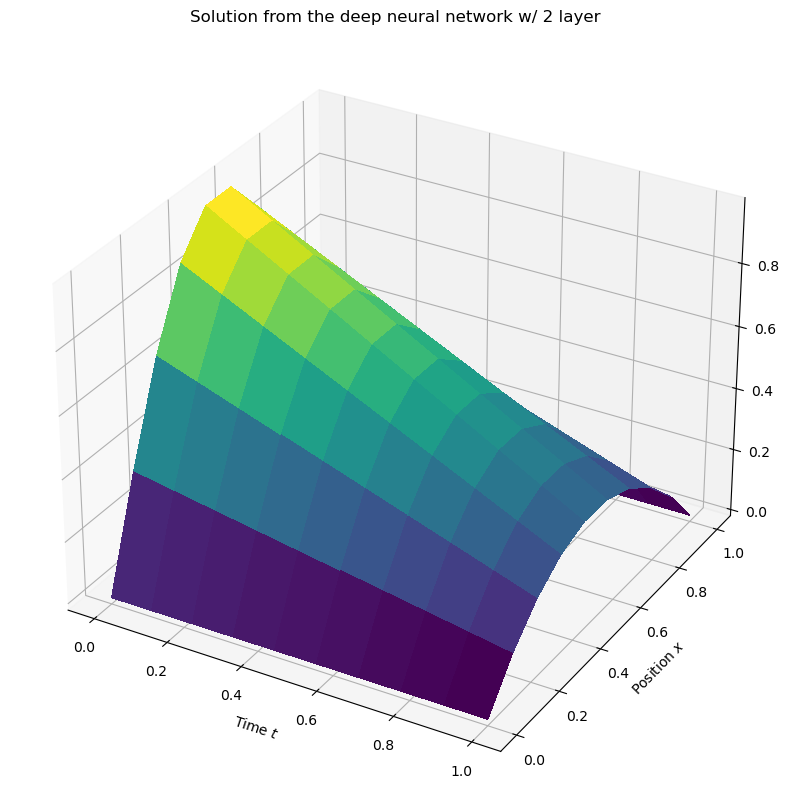

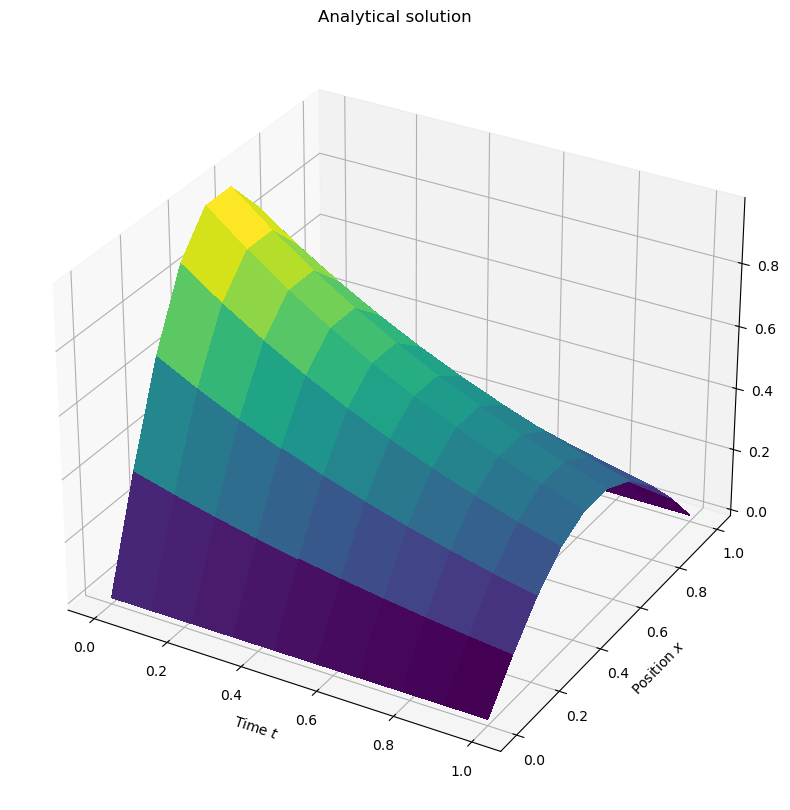

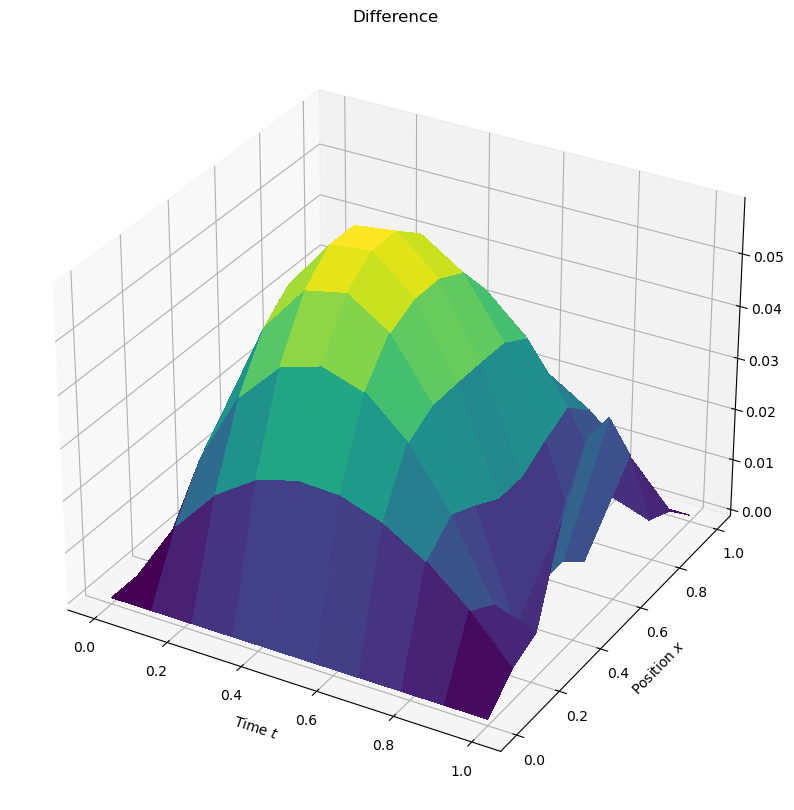

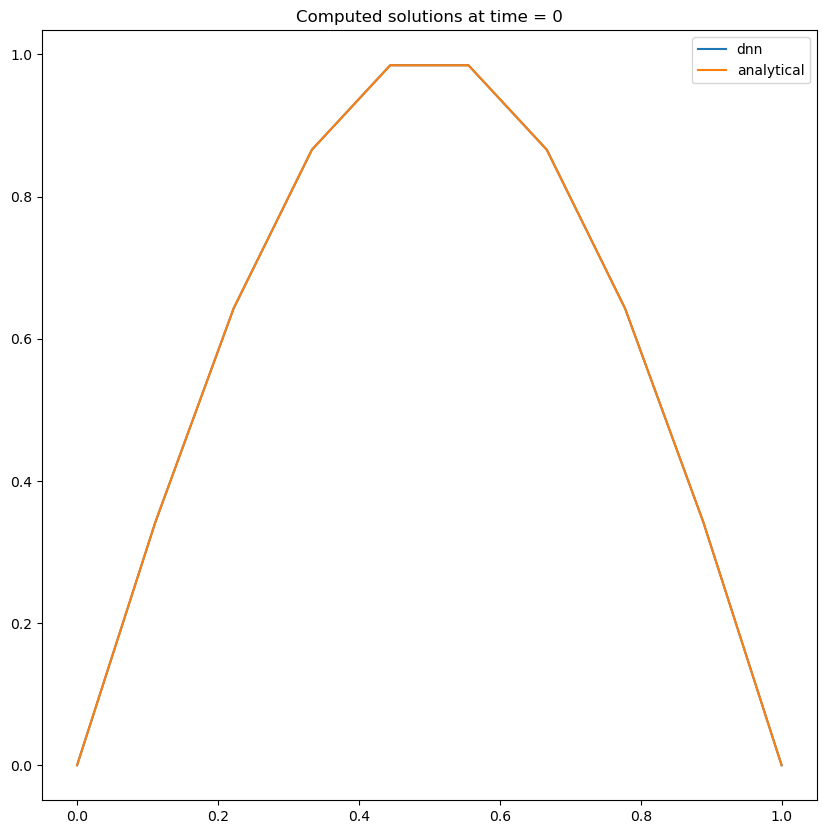

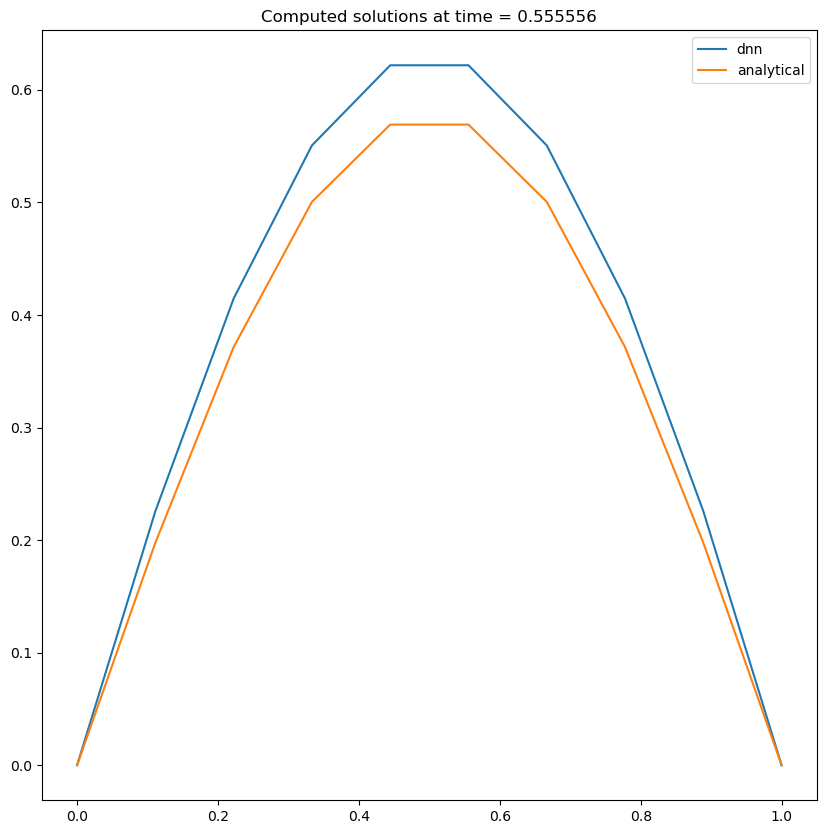

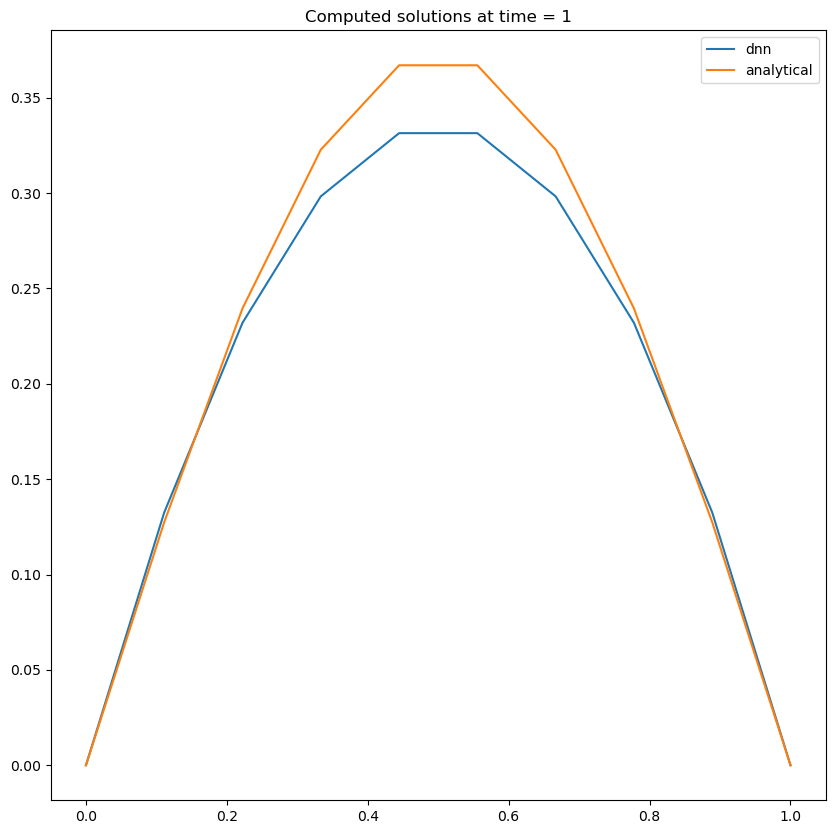

In [6]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0
    k=0.1
    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - k*g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum /( np.size(x)*np.size(t) )

## For comparison, define the analytical solution
def g_analytic(point):
    x,t = point
    k=0.1
    return np.exp(-np.pi**2*t*k)*np.sin(np.pi*x)

## Set up a function for training the network to solve for the equation

def solve_pde_deep_neural_network(x, t, num_neurons, num_iter, lmb, beta1=0.9, beta2=0.999, epsilon=1e-8):
    N_hidden = np.size(num_neurons)

    # Initialize the list of parameters
    P = [None] * (N_hidden + 1)

    P[0] = npr.randn(num_neurons[0], 2 + 1)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)

    P[-1] = npr.randn(1, num_neurons[-1] + 1)

    print('Initial cost: ', cost_function(P, x, t))

    cost_function_grad = grad(cost_function, 0)

    # Initialize first and second moment terms for each parameter
    m = [np.zeros_like(param) for param in P]
    v = [np.zeros_like(param) for param in P]

    # Initialize time step
    t_ = 0

    # Perform Adam optimization
    for i in range(num_iter):
        t_ += 1
        cost_grad = cost_function_grad(P, x, t)

        for l in range(N_hidden + 1):
            m[l] = beta1 * m[l] + (1 - beta1) * cost_grad[l]
            v[l] = beta2 * v[l] + (1 - beta2) * (cost_grad[l] ** 2)

            m_hat = m[l] / (1 - beta1 ** t_)
            v_hat = v[l] / (1 - beta2 ** t_)

            P[l] = P[l] - lmb * m_hat / (np.sqrt(v_hat) + epsilon)

    print('Final cost: ', cost_function(P, x, t))

    return P


if __name__ == '__main__':
    ### Use the neural network:
    lmb_vals = np.logspace(-3, -1, 3)
    directorio = "./Imagenes/AM"
    datos_AM=[]

    for i in lmb_vals:
        nameFolder='lambda_'+"{:.2e}".format(i)
        crear_carpeta(directorio,nameFolder)

        print('-----------    Lambda= ', i ,'   --------------')
        npr.seed(15)

        ## Decide the vales of arguments to the function to solve
        Nx = 10; Nt = 10
        x = np.linspace(0, 1, Nx)
        t = np.linspace(0,1,Nt)

        ## Set up the parameters for the network
        num_hidden_neurons = [100, 25]
        num_iter = 250
        lmb = i

        P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

        

            ## Store the results
        g_dnn_ag = np.zeros((Nx, Nt))
        G_analytical = np.zeros((Nx, Nt))
        for i,x_ in enumerate(x):
            for j, t_ in enumerate(t):
                point = np.array([x_, t_])
                g_dnn_ag[i,j] = g_trial(point,P)

                G_analytical[i,j] = g_analytic(point)
        datos_AM.append(g_dnn_ag)

        # Find the map difference between the analytical and the computed solution
        diff_ag = np.abs(g_dnn_ag - G_analytical)
        print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

        ## Plot the solutions in two dimensions, that being in position and time

        directory_figure= os.path.join(directorio,nameFolder)

        T,X = np.meshgrid(t,x)

        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
        s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        
        name_figure=os.path.join(directory_figure,'NN_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Analytical solution')
        s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Analytical_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Difference')
        s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Difference')
        plt.savefig(name_figure)

        ## Take some slices of the 3D plots just to see the solutions at particular times
        indx1 = 0
        indx2 = int(Nt/2)
        indx3 = Nt-1

        t1 = t[indx1]
        t2 = t[indx2]
        t3 = t[indx3]

        # Slice the results from the DNN
        res1 = g_dnn_ag[:,indx1]
        res2 = g_dnn_ag[:,indx2]
        res3 = g_dnn_ag[:,indx3]

        # Slice the analytical results
        res_analytical1 = G_analytical[:,indx1]
        res_analytical2 = G_analytical[:,indx2]
        res_analytical3 = G_analytical[:,indx3]

        # Plot the slices
        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t1)
        plt.plot(x, res1)
        plt.plot(x,res_analytical1)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t1")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t2)
        plt.plot(x, res2)
        plt.plot(x,res_analytical2)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t2")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t3)
        plt.plot(x, res3)
        plt.plot(x,res_analytical3)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t3")
        plt.savefig(name_figure)

        plt.show()

## COMPARISON AMONG THE THREE METHODS

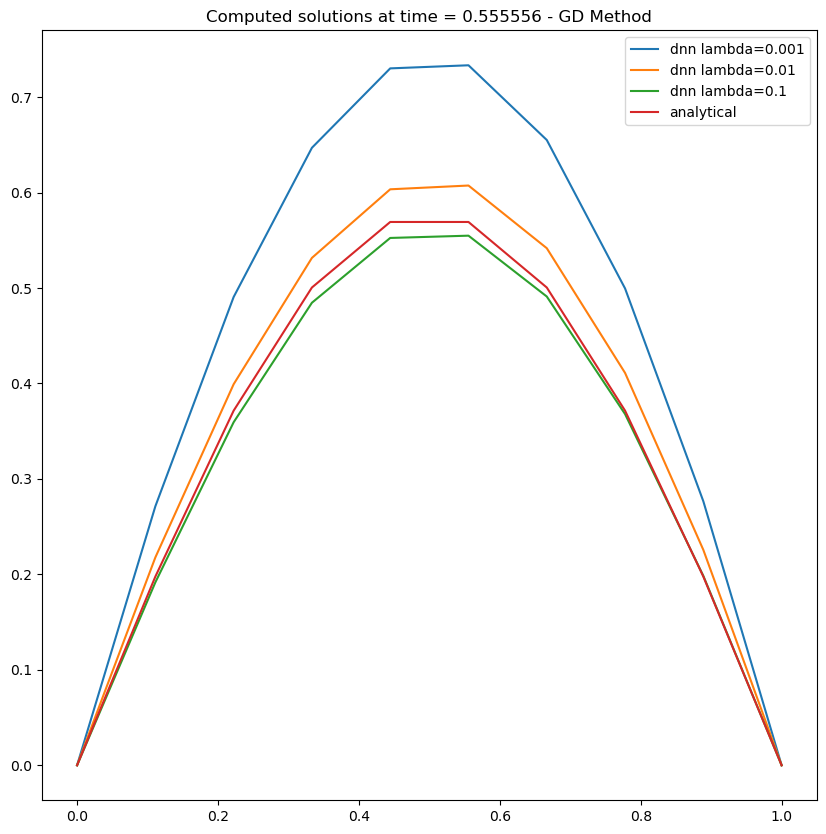

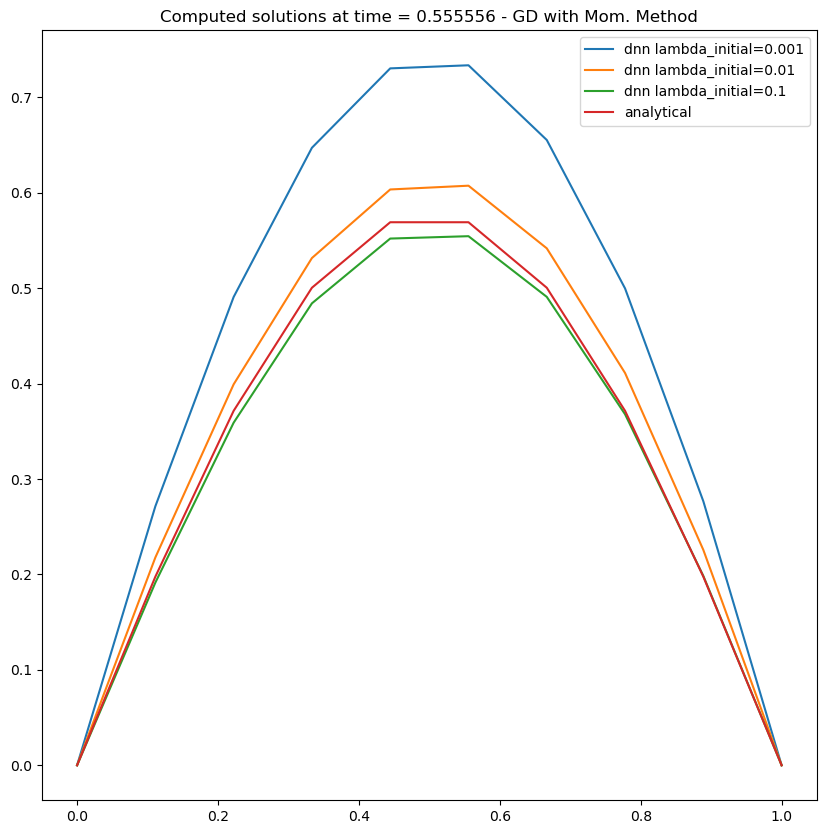

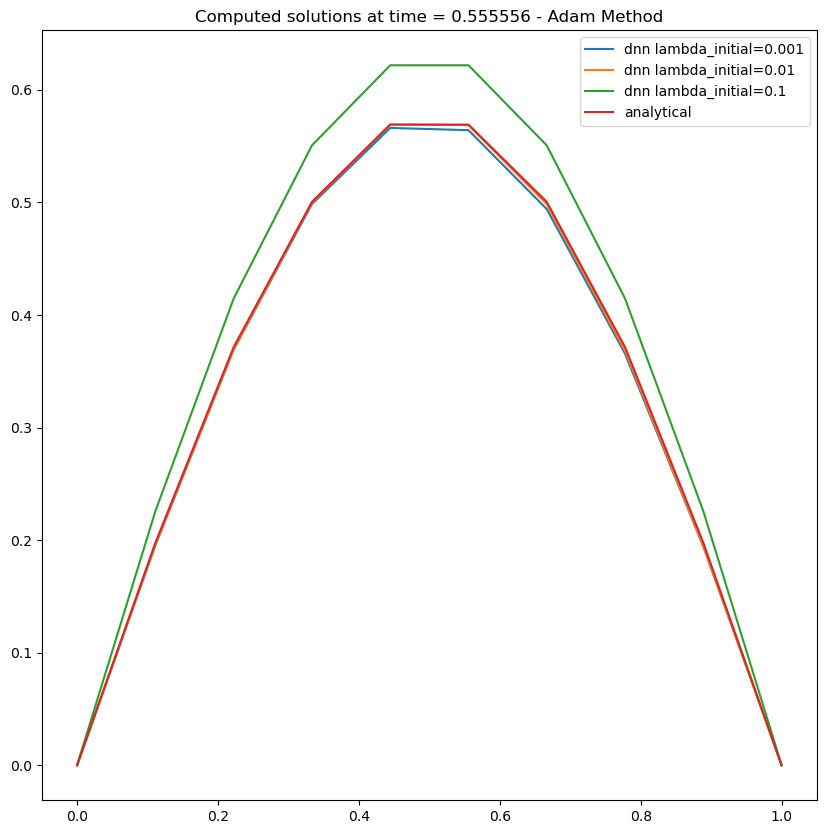

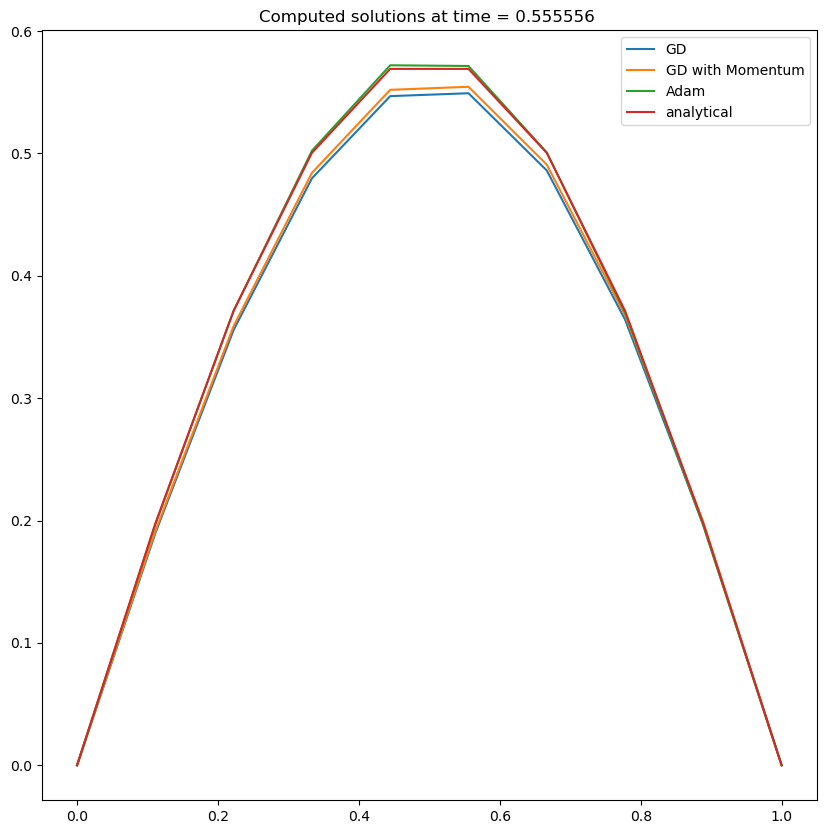

In [21]:
T,X = np.meshgrid(t,x)

## Take some slices of the 3D plots just to see the solutions at particular times

indx = int(Nt/2)
t_ref = t[indx]


# Slice the results from the DNN and GD method

GD_res_1 = datos_GD[0][:,indx]
GD_res_2 = datos_GD[1][:,indx]
GD_res_3 = datos_GD[2][:,indx]

# Slice the results from the DNN and MGD method

MGD_res_1 = datos_MGD[0][:,indx]
MGD_res_2 = datos_MGD[1][:,indx]
MGD_res_3 = datos_MGD[2][:,indx]

# Slice the results from the DNN and AM method

AM_res_1 = datos_AM[0][:,indx]
AM_res_2 = datos_AM[1][:,indx]
AM_res_3 = datos_AM[2][:,indx]


res_analytical = G_analytical[:,indx2]

#GD method

plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g - GD Method"%t_ref)
plt.plot(x,GD_res_1 )
plt.plot(x,GD_res_2 )
plt.plot(x,GD_res_3 )
plt.plot(x,res_analytical)
plt.legend(['dnn lambda=0.001','dnn lambda=0.01','dnn lambda=0.1','analytical'])

#MGD method

plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g - GD with Mom. Method"%t_ref)
plt.plot(x,MGD_res_1 )
plt.plot(x,MGD_res_2 )
plt.plot(x,MGD_res_3 )
plt.plot(x,res_analytical)
plt.legend(['dnn lambda_initial=0.001','dnn lambda_initial=0.01','dnn lambda_initial=0.1','analytical'])



plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g - Adam Method"%t_ref)
plt.plot(x,AM_res_1 )
plt.plot(x,AM_res_2 )
plt.plot(x,AM_res_3 )
plt.plot(x,res_analytical)
plt.legend(['dnn lambda_initial=0.001','dnn lambda_initial=0.01','dnn lambda_initial=0.1','analytical'])



# Slice the results from the DNN and GD method


GD_best = datos_GD[2][:,indx]

# Slice the results from the DNN and MGD method


MGD_best = datos_MGD[2][:,indx]

# Slice the results from the DNN and AM method


AM_best = datos_AM[1][:,indx]


plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g "%t_ref)
plt.plot(x,GD_best )
plt.plot(x,MGD_best )
plt.plot(x,AM_best)
plt.plot(x,res_analytical)
plt.legend(['GD','GD with Momentum','Adam','analytical'])




## PDE with Neumann Conditions using ADAM method

-----------    Lambda=  0.01    --------------
Initial cost:  0.3867592861182457
Final cost:  0.001166277844775731
Max absolute difference between the analytical solution and the network: 0.134578


/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_1394/1444883634.py:231: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/var/folders/vg/6vygxs293f7c17grg_hwzg1h0000gn/T/ipykernel_1394/1444883634.py:244: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projectio

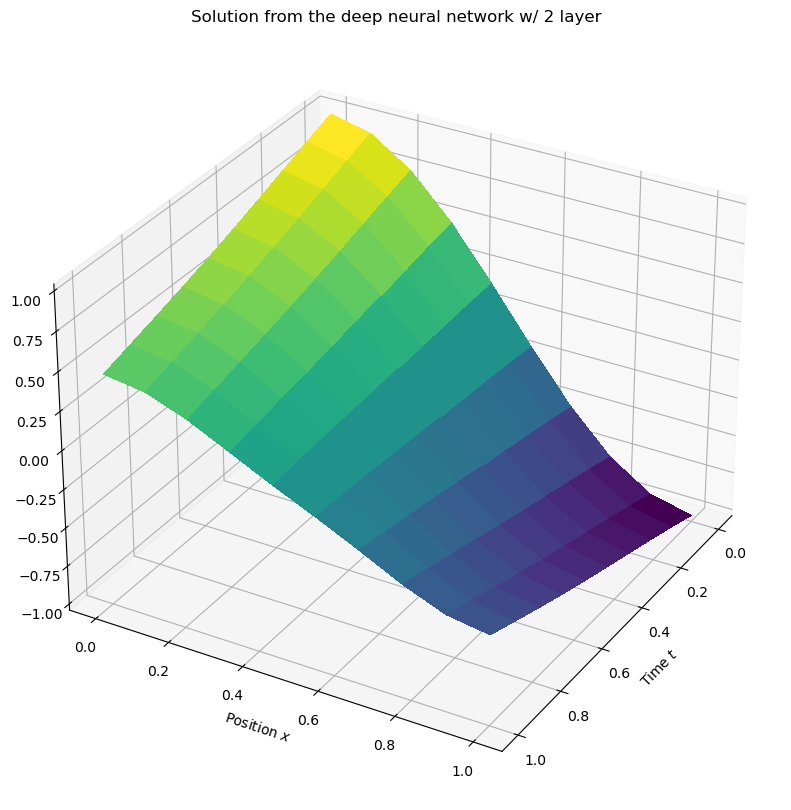

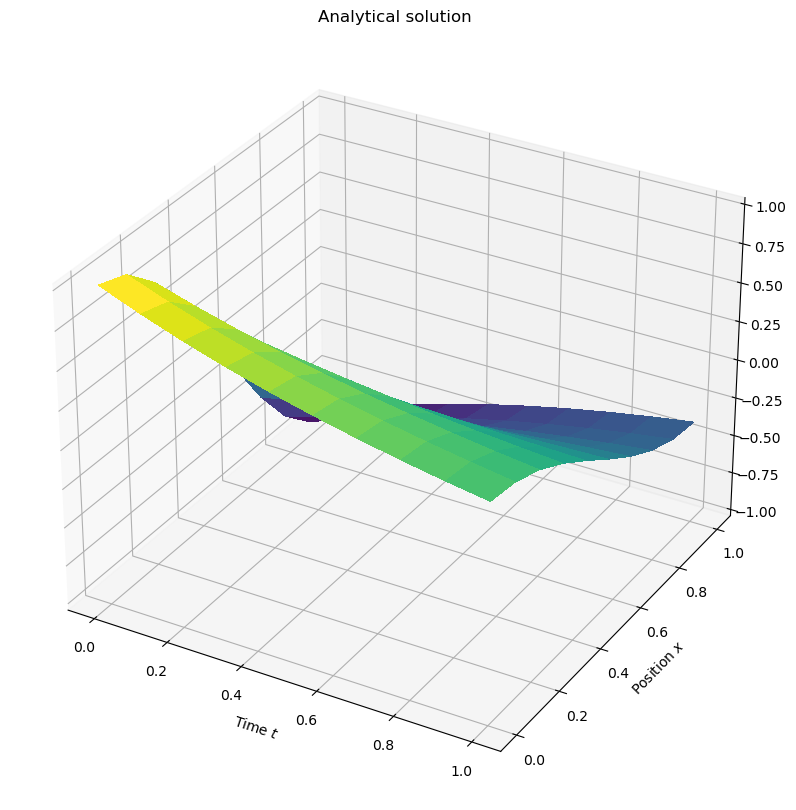

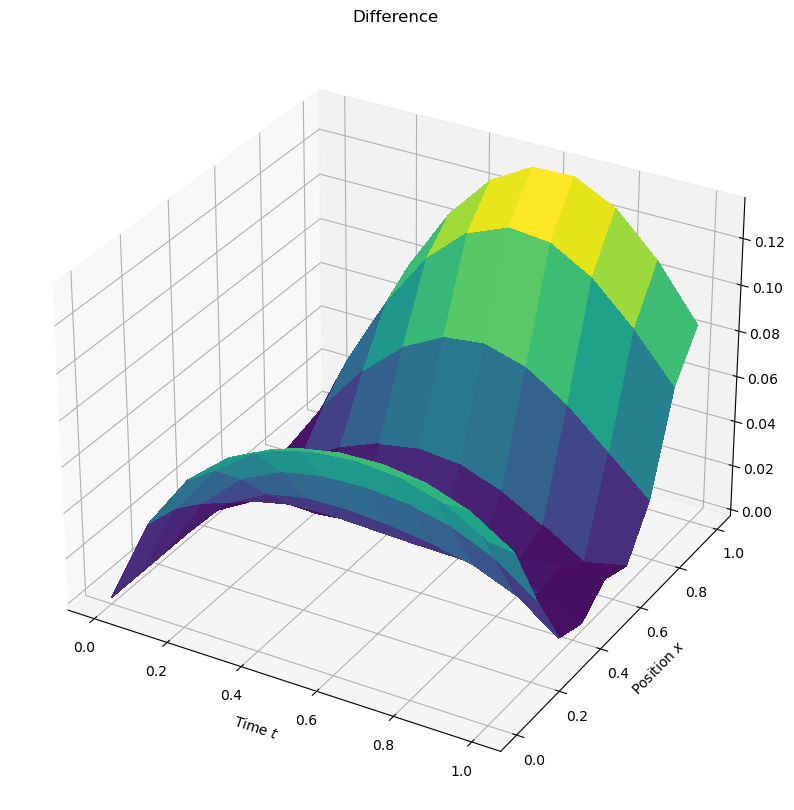

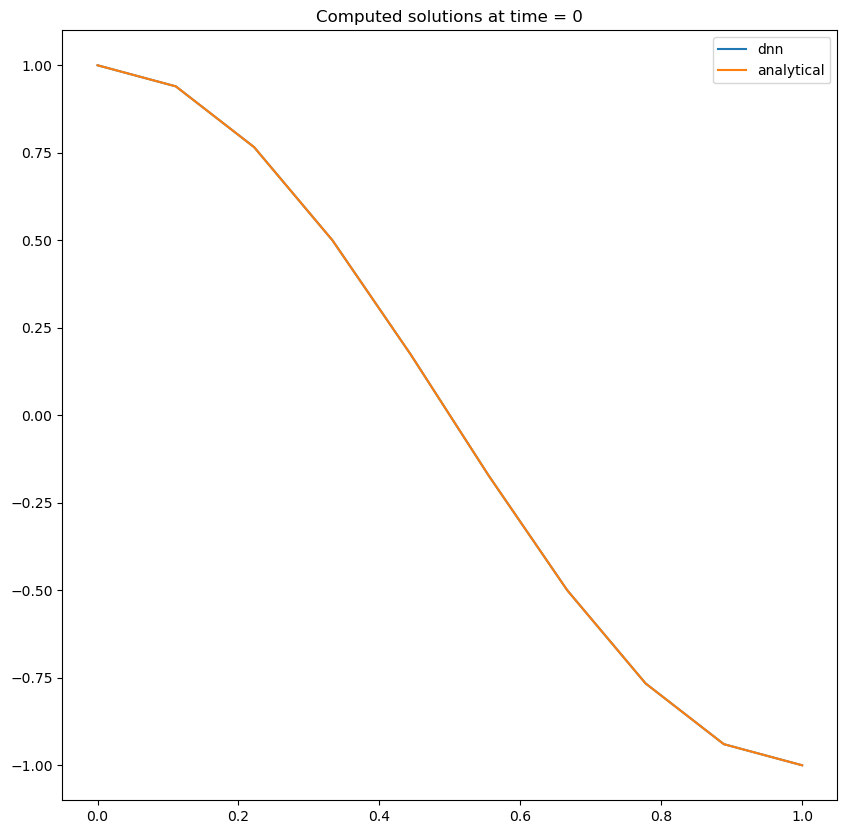

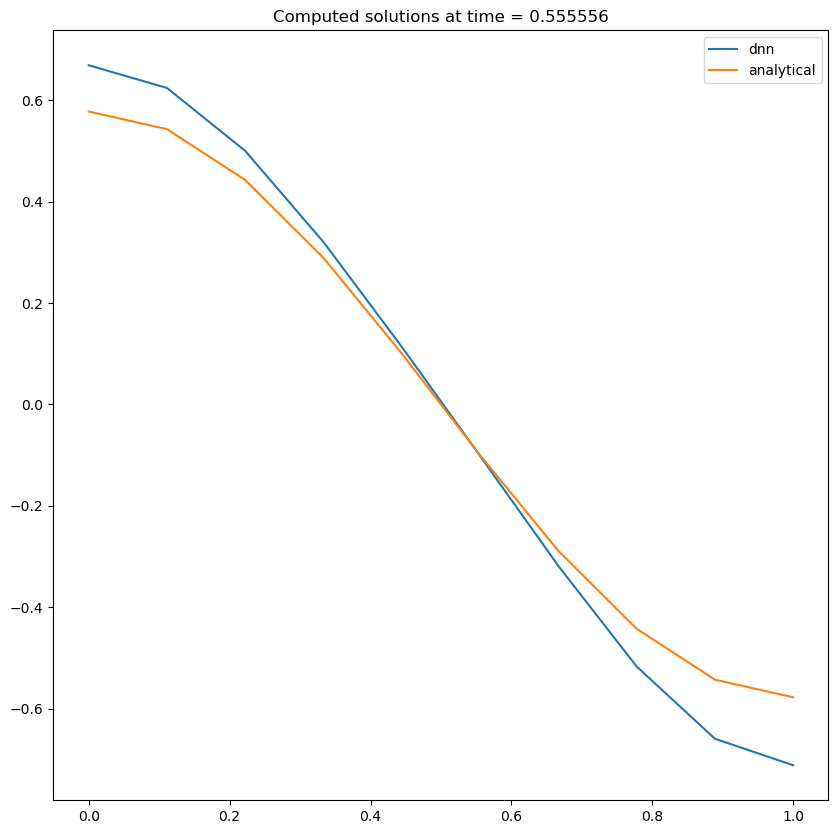

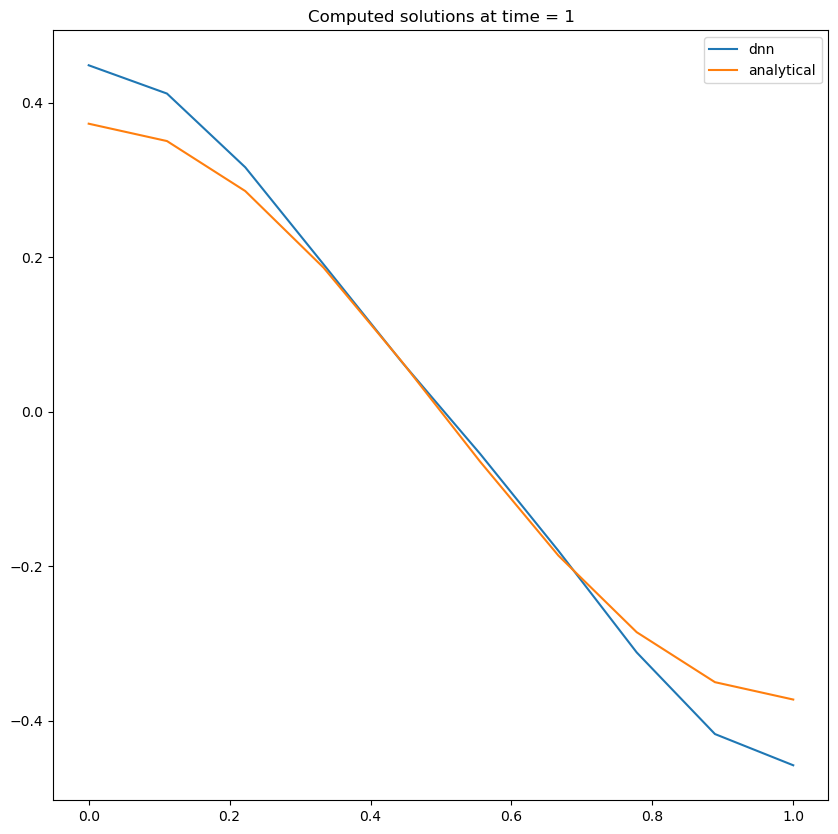

-----------    Lambda=  0.1    --------------
Initial cost:  0.3867592861182457
Final cost:  0.002183275252735491
Max absolute difference between the analytical solution and the network: 0.16253


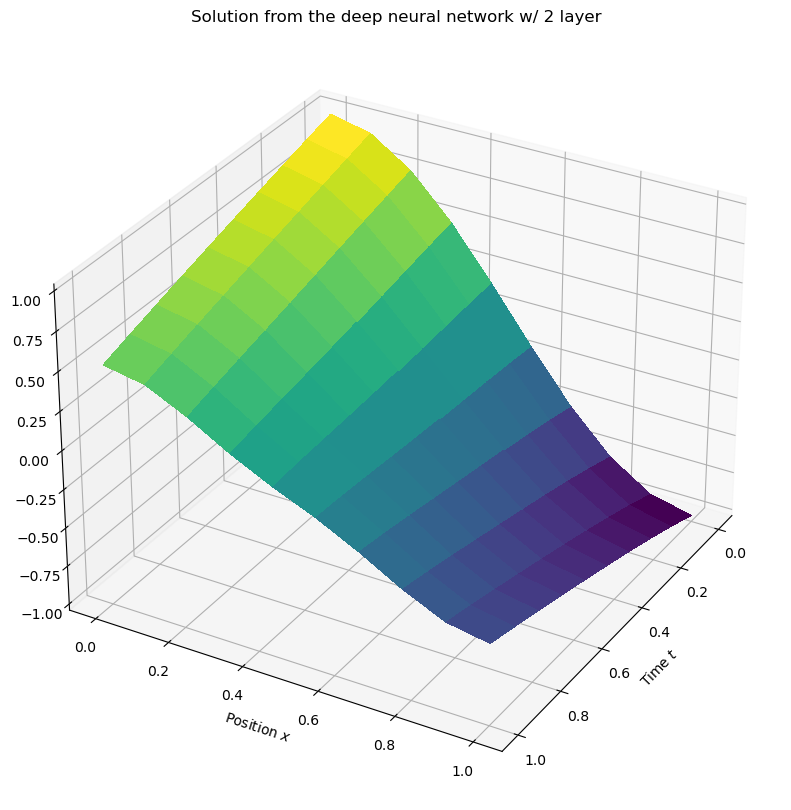

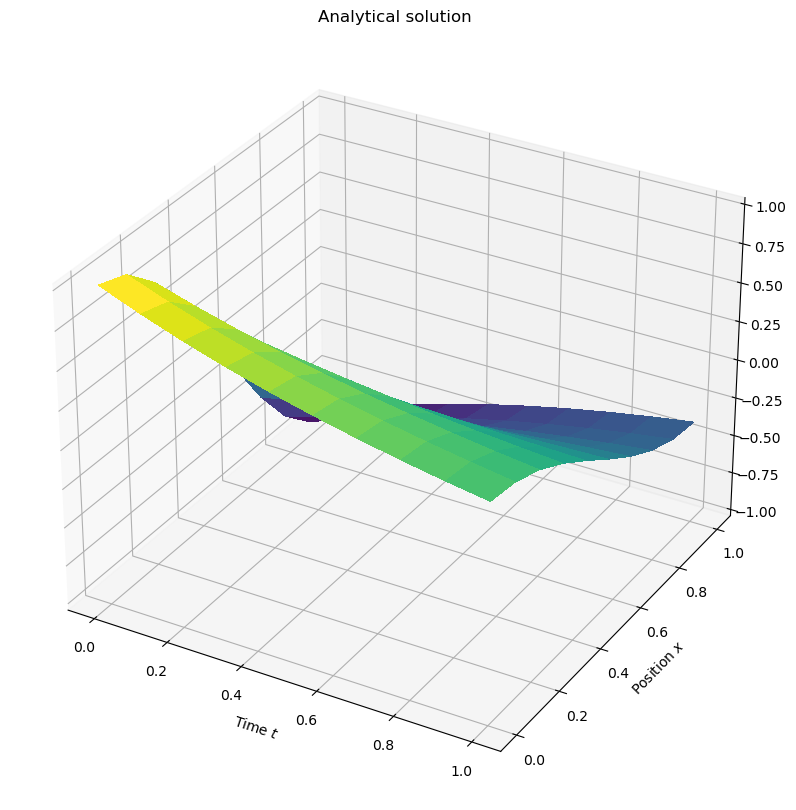

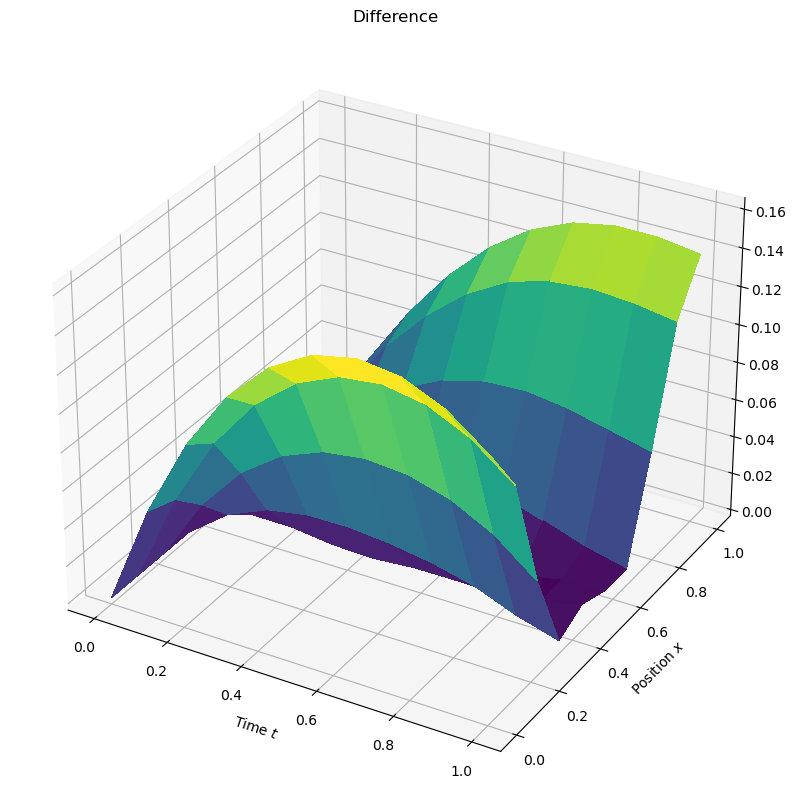

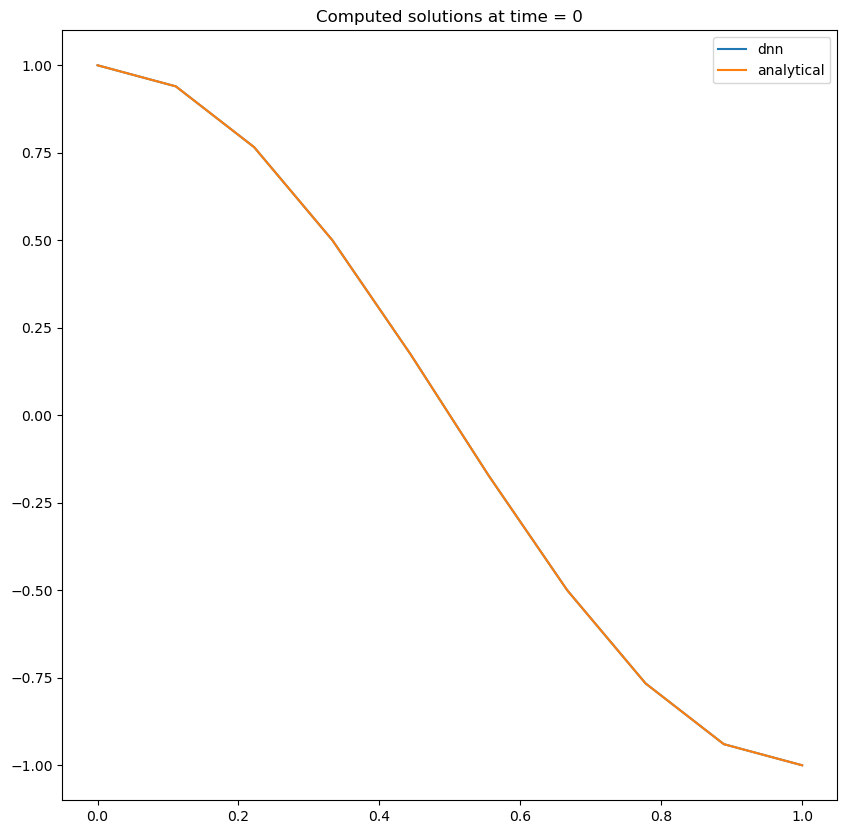

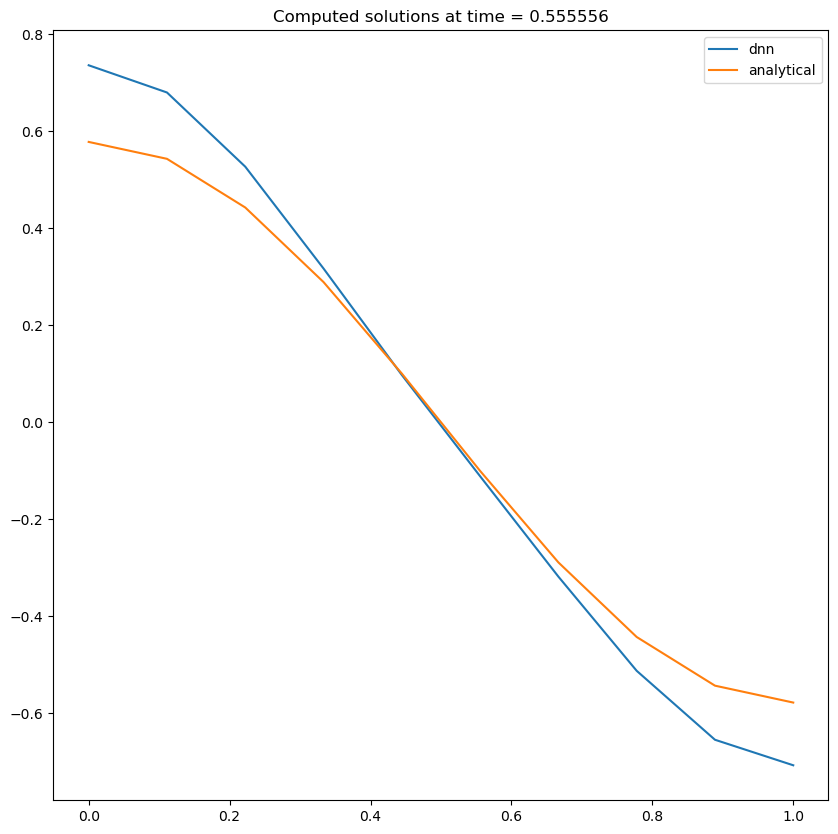

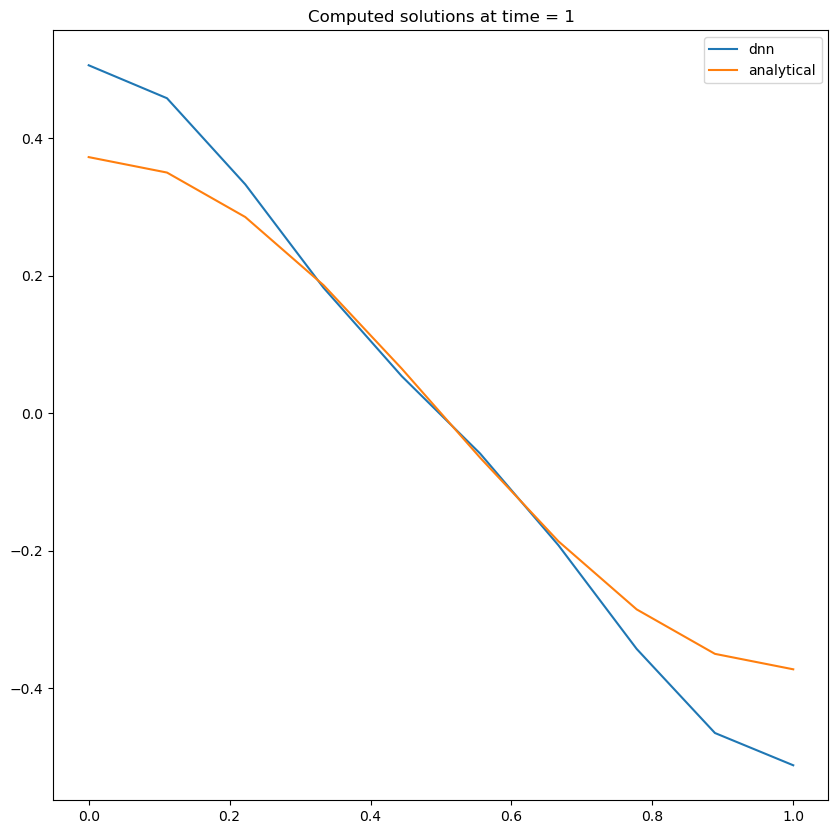

In [2]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad,elementwise_grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os


def crear_carpeta(directorio, nombre_carpeta):
    """
    Crea una carpeta en el directorio especificado.

    Args:
    - directorio (str): El directorio donde se creará la carpeta.
    - nombre_carpeta (str): El nombre de la carpeta a crear.

    Returns:
    - str: Un mensaje indicando si la carpeta fue creada o si ya existía.
    """
    # Unir el directorio y el nombre de la carpeta
    ruta_carpeta = os.path.join(directorio, nombre_carpeta)

    # Verificar si la carpeta no existe
    if not os.path.exists(ruta_carpeta):
        # Crear la carpeta si no existe
        os.makedirs(ruta_carpeta)
        return f"La carpeta '{nombre_carpeta}' ha sido creada en '{directorio}'."
    else:
        return f"La carpeta '{nombre_carpeta}' ya existe en '{directorio}'."


## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x):
    return np.cos(np.pi*x)

def g_trial(point,P):
    x,t = point
    return u(x) + t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    errorInner = 0
    errorBC=0
    k=0.1
    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)
    gamma_BC=0.98
    gamma_Inner=0.02

    # Calcula la derivada de g_trial en el punto (x0, y0)
  

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])
         



            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

           

            

            g_t_dt = g_t_jacobian[1]

            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            errorInner+= ( (g_t_dt - k*g_t_d2x) - func)**2
    
    g_trial_grad_at_point = elementwise_grad(g_trial,0)
    #BOUNDARY CONDITIONS PART
    for x_ in [0,1]:
        for t_ in t:
            point_BC_1=np.array([x_,t_])
            g_t_grad_BC_1 = np.abs(g_trial_grad_at_point(point_BC_1, P)[0] )
            errorBC+= (g_t_grad_BC_1**2)

    return  (gamma_Inner*( errorInner/( np.size(x)*np.size(t)-2*np.size(t))) + gamma_BC*(errorBC /( 2*np.size(t)) ))
## For comparison, define the analytical solution
def g_analytic(point):
    x,t = point
    k=0.1
    return np.exp(-np.pi**2*t*k)*np.cos(np.pi*x)

## Set up a function for training the network to solve for the equation
def solve_pde_deep_neural_network(x, t, num_neurons, num_iter, lmb, beta1=0.9, beta2=0.999, epsilon=1e-8):
    N_hidden = np.size(num_neurons)

    # Initialize the list of parameters
    P = [None] * (N_hidden + 1)

    P[0] = npr.randn(num_neurons[0], 2 + 1)
    for l in range(1, N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l - 1] + 1)

    P[-1] = npr.randn(1, num_neurons[-1] + 1)

    print('Initial cost: ', cost_function(P, x, t))

    cost_function_grad = grad(cost_function, 0)

    # Initialize first and second moment terms for each parameter
    m = [np.zeros_like(param) for param in P]
    v = [np.zeros_like(param) for param in P]

    # Initialize time step
    t_ = 0

    # Perform Adam optimization
    for i in range(num_iter):
        t_ += 1
        cost_grad = cost_function_grad(P, x, t)

        for l in range(N_hidden + 1):
            m[l] = beta1 * m[l] + (1 - beta1) * cost_grad[l]
            v[l] = beta2 * v[l] + (1 - beta2) * (cost_grad[l] ** 2)

            m_hat = m[l] / (1 - beta1 ** t_)
            v_hat = v[l] / (1 - beta2 ** t_)

            P[l] = P[l] - lmb * m_hat / (np.sqrt(v_hat) + epsilon)

    print('Final cost: ', cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    lmb_vals = np.logspace(-2, -1, 2)
    directorio = "./Imagenes/GD_SECOND_EQUATION"

    for i in lmb_vals:
        nameFolder='lambda_'+"{:.2e}".format(i)
        crear_carpeta(directorio,nameFolder)

        print('-----------    Lambda= ', i ,'   --------------')
        npr.seed(15)

        ## Decide the vales of arguments to the function to solve
        Nx = 10; Nt = 10
        x = np.linspace(0, 1, Nx)
        t = np.linspace(0,1,Nt)

        ## Set up the parameters for the network
        num_hidden_neurons = [100,25]
        num_iter = 250
        lmb = i

        P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

        

            ## Store the results
        g_dnn_ag = np.zeros((Nx, Nt))
        G_analytical = np.zeros((Nx, Nt))
        for i,x_ in enumerate(x):
            for j, t_ in enumerate(t):
                point = np.array([x_, t_])
                g_dnn_ag[i,j] = g_trial(point,P)

                G_analytical[i,j] = g_analytic(point)

        # Find the map difference between the analytical and the computed solution
        diff_ag = np.abs(g_dnn_ag - G_analytical)
        print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

        ## Plot the solutions in two dimensions, that being in position and time

        directory_figure= os.path.join(directorio,nameFolder)

        T,X = np.meshgrid(t,x)

        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
        s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        ax.view_init(elev=30, azim=30)

        
        name_figure=os.path.join(directory_figure,'NN_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Analytical solution')
        s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Analytical_Solution')
        plt.savefig(name_figure)


        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        ax.set_title('Difference')
        s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
        ax.set_xlabel('Time $t$')
        ax.set_ylabel('Position $x$')
        name_figure=os.path.join(directory_figure,'Difference')
        plt.savefig(name_figure)

        ## Take some slices of the 3D plots just to see the solutions at particular times
        indx1 = 0
        indx2 = int(Nt/2)
        indx3 = Nt-1

        t1 = t[indx1]
        t2 = t[indx2]
        t3 = t[indx3]

        # Slice the results from the DNN
        res1 = g_dnn_ag[:,indx1]
        res2 = g_dnn_ag[:,indx2]
        res3 = g_dnn_ag[:,indx3]

        # Slice the analytical results
        res_analytical1 = G_analytical[:,indx1]
        res_analytical2 = G_analytical[:,indx2]
        res_analytical3 = G_analytical[:,indx3]

        # Plot the slices
        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t1)
        plt.plot(x, res1)
        plt.plot(x,res_analytical1)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t1")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t2)
        plt.plot(x, res2)
        plt.plot(x,res_analytical2)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t2")
        plt.savefig(name_figure)

        plt.figure(figsize=(10,10))
        plt.title("Computed solutions at time = %g"%t3)
        plt.plot(x, res3)
        plt.plot(x,res_analytical3)
        plt.legend(['dnn','analytical'])
        name_figure=os.path.join(directory_figure,"SolutionAt_t3")
        plt.savefig(name_figure)

        plt.show()